In [1]:
#importing all required libraries
import pandas as pd 
import os 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from scipy import stats 
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import sklearn.feature_selection as fs
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import datetime
from matplotlib.dates import DateFormatter
# from sklearn import cross_validation
%matplotlib inline

C:\Users\Gursimran\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#getting current path
os.getcwd()

'C:\\Users\\Gursimran\\Downloads'

In [3]:
#Changing directory
os.chdir("F:/")

In [4]:
#checking directory after changing
os.getcwd()

'F:\\'

In [5]:
#Loading Dataset
BikeData = pd.read_csv("day.csv")

In [6]:
#Checking shape of a dataset
BikeData.shape

(731, 16)

In [7]:
#Inspecting first 5 rows of a dataset.
BikeData.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [8]:
#Inspecting last 5 rows of a dataset.
BikeData.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
726      727  2012-12-27       1   1    12        0        4           1   
727      728  2012-12-28       1   1    12        0        5           1   
728      729  2012-12-29       1   1    12        0        6           0   
729      730  2012-12-30       1   1    12        0        0           0   
730      731  2012-12-31       1   1    12        0        1           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
726           2  0.254167  0.226642  0.652917   0.350133     247        1867   
727           2  0.253333  0.255046  0.590000   0.155471     644        2451   
728           2  0.253333  0.242400  0.752917   0.124383     159        1182   
729           1  0.255833  0.231700  0.483333   0.350754     364        1432   
730           2  0.215833  0.223487  0.577500   0.154846     439        2290   

      cnt  
726  2114  
727  3095  
728  1341  
729  1796  
730  2729

In [9]:
#Checking type of a dataset
type(BikeData)

pandas.core.frame.DataFrame

In [10]:
#Changing name of all variables in a dataset.
BikeData.rename(columns={'instant':'Index'}, inplace=True)
BikeData.rename(columns={'dteday':'Date1'}, inplace=True)
BikeData.rename(columns={'season':'Season'}, inplace=True)
BikeData.rename(columns={'yr':'Year'}, inplace=True)
BikeData.rename(columns={'mnth':'Month'}, inplace=True)
BikeData.rename(columns={'holiday':'Holiday'}, inplace=True)
BikeData.rename(columns={'weekday':'WeekDay'}, inplace=True)
BikeData.rename(columns={'workingday':'WorkingDay'},inplace=True)
BikeData.rename(columns={'weathersit':'DayWeather'}, inplace=True)
BikeData.rename(columns={'temp':'Temperature'}, inplace=True)
BikeData.rename(columns={'atemp':'FeelingTemperature'}, inplace=True)
BikeData.rename(columns={'hum':'Humidity'}, inplace=True)
BikeData.rename(columns={'windspeed':'WindSpeed'}, inplace=True)
BikeData.rename(columns={'casual':'CasualUsers'}, inplace=True)
BikeData.rename(columns={'registered':'RegisteredUsers'}, inplace=True)
BikeData.rename(columns={'cnt':'RentedBikes'}, inplace=True)

In [11]:
#Inspecting last 5 rows of dataset after renaming variable names.
BikeData.tail()

Index       Date1  Season  Year  Month  Holiday  WeekDay  WorkingDay  \
726    727  2012-12-27       1     1     12        0        4           1   
727    728  2012-12-28       1     1     12        0        5           1   
728    729  2012-12-29       1     1     12        0        6           0   
729    730  2012-12-30       1     1     12        0        0           0   
730    731  2012-12-31       1     1     12        0        1           1   

     DayWeather  Temperature  FeelingTemperature  Humidity  WindSpeed  \
726           2     0.254167            0.226642  0.652917   0.350133   
727           2     0.253333            0.255046  0.590000   0.155471   
728           2     0.253333            0.242400  0.752917   0.124383   
729           1     0.255833            0.231700  0.483333   0.350754   
730           2     0.215833            0.223487  0.577500   0.154846   

     CasualUsers  RegisteredUsers  RentedBikes  
726          247             1867         2114  
727          644             2451         3095  
728          159             1182         1341  
729          364             1432         1796  
730          439             2290         2729

In [12]:
#Inspecting frst 5 rows of dataset after renaming variable names.
BikeData.head()

Index       Date1  Season  Year  Month  Holiday  WeekDay  WorkingDay  \
0      1  2011-01-01       1     0      1        0        6           0   
1      2  2011-01-02       1     0      1        0        0           0   
2      3  2011-01-03       1     0      1        0        1           1   
3      4  2011-01-04       1     0      1        0        2           1   
4      5  2011-01-05       1     0      1        0        3           1   

   DayWeather  Temperature  FeelingTemperature  Humidity  WindSpeed  \
0           2     0.344167            0.363625  0.805833   0.160446   
1           2     0.363478            0.353739  0.696087   0.248539   
2           1     0.196364            0.189405  0.437273   0.248309   
3           1     0.200000            0.212122  0.590435   0.160296   
4           1     0.226957            0.229270  0.436957   0.186900   

   CasualUsers  RegisteredUsers  RentedBikes  
0          331              654          985  
1          131              670          801  
2          120             1229         1349  
3          108             1454         1562  
4           82             1518         1600

In [13]:
#Inspecting statistical terms on Dataset.
BikeData.describe()

Index      Season        Year       Month     Holiday     WeekDay  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       WorkingDay  DayWeather  Temperature  FeelingTemperature    Humidity  \
count  731.000000  731.000000   731.000000          731.000000  731.000000   
mean     0.683995    1.395349     0.495385            0.474354    0.627894   
std      0.465233    0.544894     0.183051            0.162961    0.142429   
min      0.000000    1.000000     0.059130            0.079070    0.000000   
25%      0.000000    1.000000     0.337083            0.337842    0.520000   
50%      1.000000    1.000000     0.498333            0.486733    0.626667   
75%      1.000000    2.000000     0.655417            0.608602    0.730209   
max      1.000000    3.000000     0.861667            0.840896    0.972500   

        WindSpeed  CasualUsers  RegisteredUsers  RentedBikes  
count  731.000000   731.000000       731.000000   731.000000  
mean     0.190486   848.176471      3656.172367  4504.348837  
std      0.077498   686.622488      1560.256377  1937.211452  
min      0.022392     2.000000        20.000000    22.000000  
25%      0.134950   315.500000      2497.000000  3152.000000  
50%      0.180975   713.000000      3662.000000  4548.000000  
75%      0.233214  1096.000000      4776.500000  5956.000000  
max      0.507463  3410.000000      6946.000000  8714.000000

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


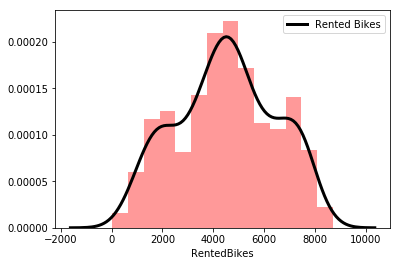

In [25]:
#Univariate Analysis of Numerical Attributes

#RentedBikes(Target Variable)
BikeData['RentedBikes'].describe()
sns.distplot(BikeData['RentedBikes'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Rented Bikes"}) 

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


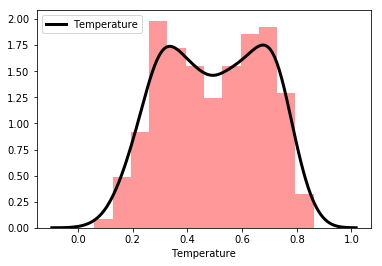

In [26]:
#Check Feeling Temperature 
sns.distplot(BikeData['Temperature'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Temperature"})  


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


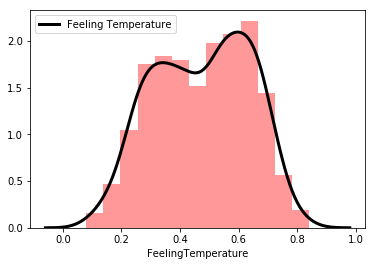

In [27]:
#Check Feeling Temperature 
sns.distplot(BikeData['FeelingTemperature'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Feeling Temperature"})  

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


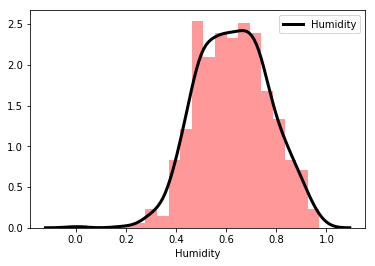

In [28]:
#Check Humidity 
sns.distplot(BikeData['Humidity'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Humidity"})   


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


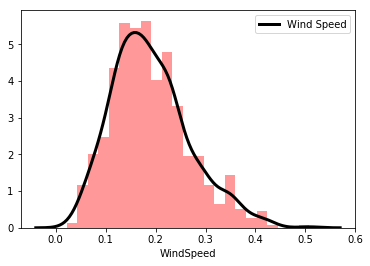

In [29]:
#Check WindSpeed 
sns.distplot(BikeData['WindSpeed'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Wind Speed"})   

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


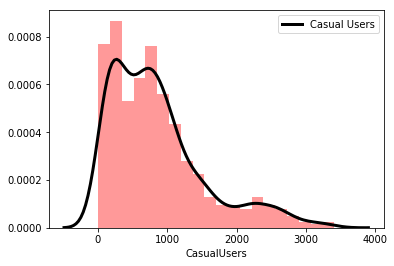

In [30]:
#Check Casual Users 
sns.distplot(BikeData['CasualUsers'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Casual Users"})   


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


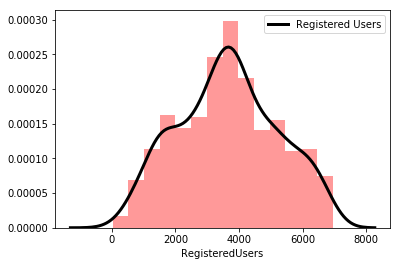

In [31]:
#Check Temperature 
sns.distplot(BikeData['RegisteredUsers'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Registered Users"})   


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


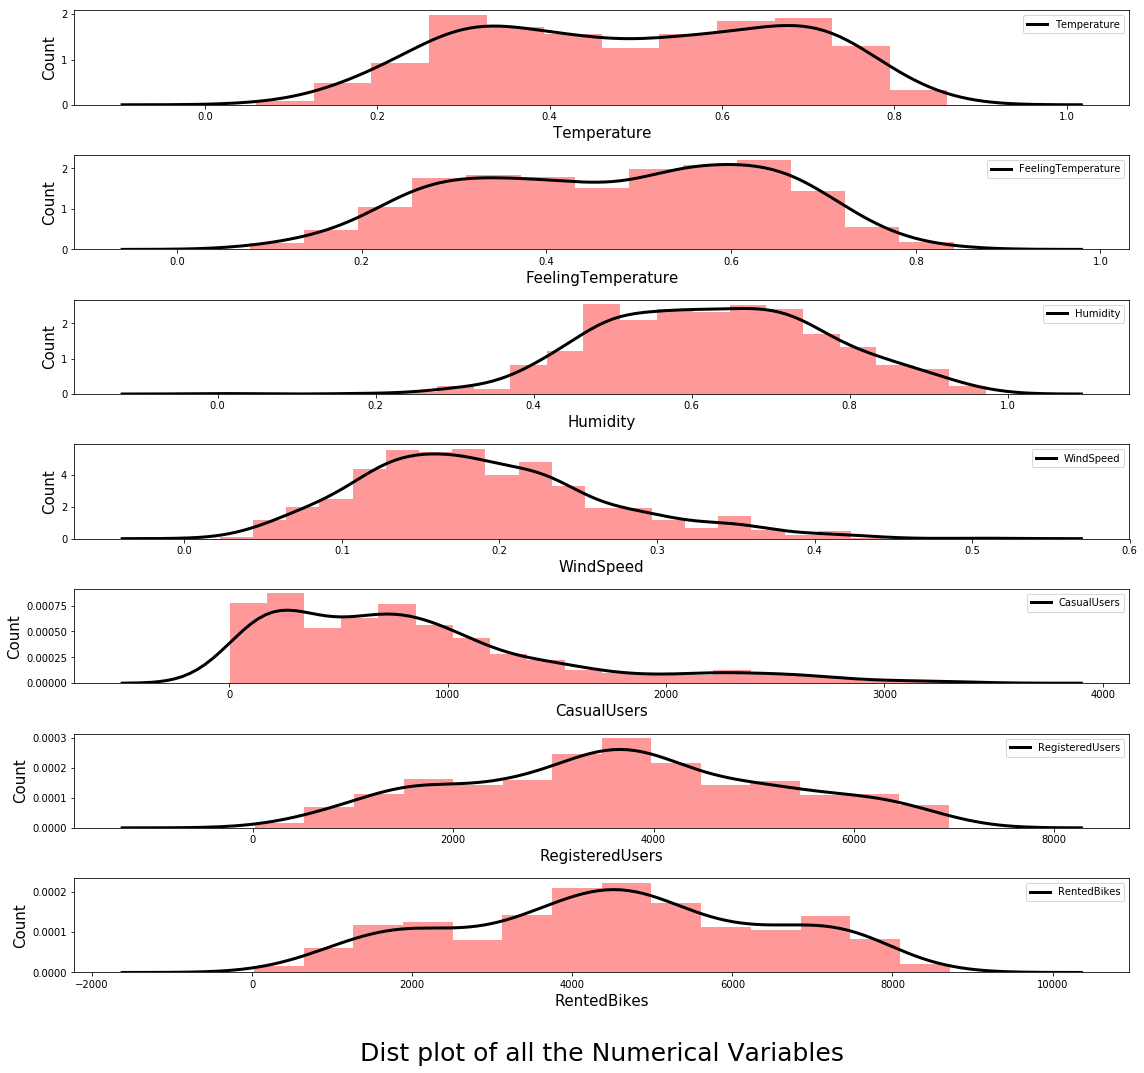

In [33]:
#Plotting Distribution plot for all numeric variables in the dataset.
col_names = ['Temperature','FeelingTemperature','Humidity','WindSpeed','CasualUsers','RegisteredUsers','RentedBikes']
fig, ax = plt.subplots(len(col_names), figsize=(16,15))
plt.title("Dist plot of all the Numerical Variables",x=0.5,y=-1,fontsize=25)
for i, col_val in enumerate(col_names):
    sns.distplot(BikeData[col_val], hist=True, ax=ax[i],color='red',kde_kws={"color": "k", "lw": 3, "label":col_val})
    ax[i].set_xlabel(col_val, fontsize=15)
    ax[i].set_ylabel('Count', fontsize=15)
    plt.tight_layout()
plt.show()


In [21]:
#Skewness and Kurtosis of Rented Bikes
print("Skewness: %f" % BikeData['RentedBikes'].skew())
print("Kurtosis: %f" % BikeData['RentedBikes'].kurt())

Skewness: -0.047353
Kurtosis: -0.811922


In [22]:
#Skewness and Kurtosis of Temperature
print("Skewness: %f" % BikeData['Temperature'].skew())
print("Kurtosis: %f" % BikeData['Temperature'].kurt())

Skewness: -0.054521
Kurtosis: -1.118864


In [23]:
#Skewness and Kurtosis of Feeling Temperature
print("Skewness: %f" % BikeData['FeelingTemperature'].skew())
print("Kurtosis: %f" % BikeData['FeelingTemperature'].kurt())

Skewness: -0.131088
Kurtosis: -0.985131


In [24]:
#Skewness and Kurtosis of Humidity
print("Skewness: %f" % BikeData['Humidity'].skew())
print("Kurtosis: %f" % BikeData['Humidity'].kurt())

Skewness: -0.069783
Kurtosis: -0.064530


In [25]:
#Skewness and Kurtosis of Wind Speed
print("Skewness: %f" % BikeData['WindSpeed'].skew())
print("Kurtosis: %f" % BikeData['WindSpeed'].kurt())

Skewness: 0.677345
Kurtosis: 0.410922


In [26]:
#Skewness and Kurtosis of Casual Users
print("Skewness: %f" % BikeData['CasualUsers'].skew())
print("Kurtosis: %f" % BikeData['CasualUsers'].kurt())

Skewness: 1.266454
Kurtosis: 1.322074


In [27]:
#Skewness and Kurtosis of Registered Users
print("Skewness: %f" % BikeData['RegisteredUsers'].skew())
print("Kurtosis: %f" % BikeData['RegisteredUsers'].kurt())

Skewness: 0.043659
Kurtosis: -0.713097


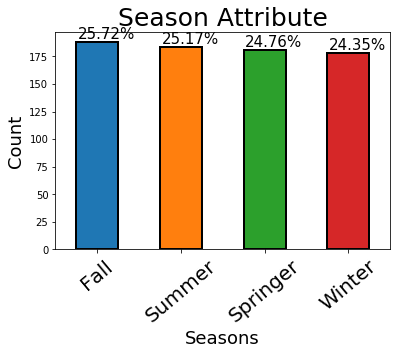

In [32]:
#Univariate analysis of categorical variables.
#Season attribute

ax = BikeData['Season'].value_counts().plot(kind='bar',align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Season Attribute", fontsize=25)
ax.set_xlabel("Seasons", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
ax.set_xticklabels(labels =["Fall","Summer","Springer","Winter"], rotation=40, fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')
plt.savefig("RentedBikes.png")

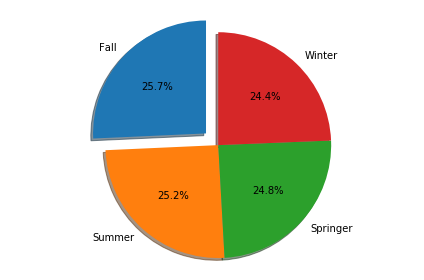

In [33]:
#Season Attribute Pie chart
df = pd.DataFrame(BikeData['Season'])
df['Season'] = df.replace([1],"Springer")
df['Season'] = df.replace([2],"Summer")
df['Season'] = df.replace([3],"Fall")
df['Season'] = df.replace([4],"Winter")
df = pd.value_counts(df.Season).to_frame().reset_index()
df.columns = ['Season','Count']
plt.pie(
    df['Count'],
    labels=df['Season'],
    shadow=True,
    explode=(0.15, 0, 0,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

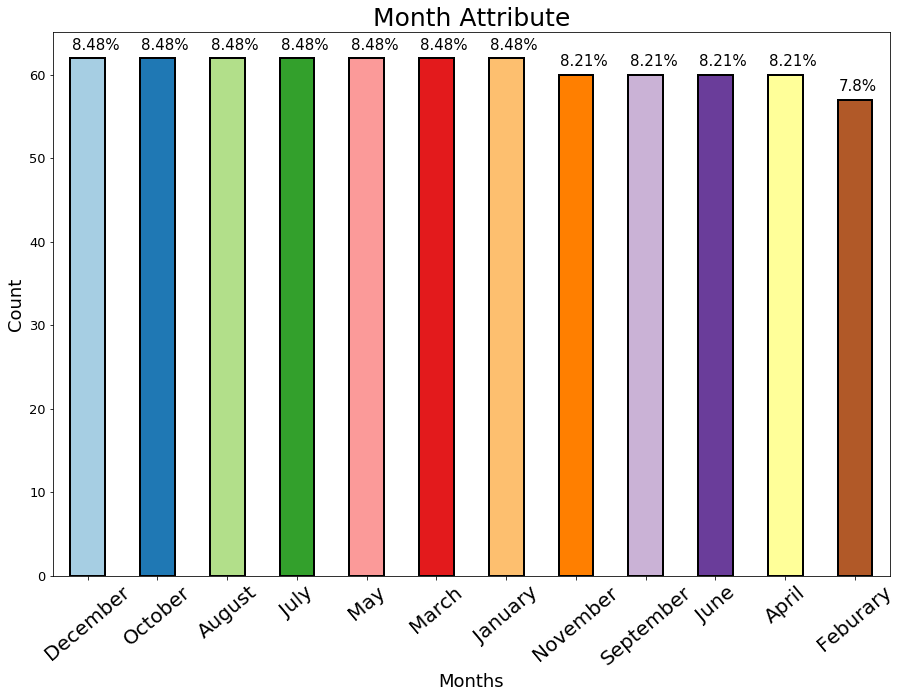

In [34]:
#univariate analsis of categorical attribute Month
ax = BikeData['Month'].value_counts().plot(kind='bar',figsize=(15,10),fontsize=13,color=sns.color_palette("Paired", 12),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Month Attribute", fontsize=25)
ax.set_xlabel("Months", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
ax.set_xticklabels(labels =["December","October","August","July","May","March","January","November","September","June","April","Feburary"], rotation=40, fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.02, i.get_height()+1, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black') 

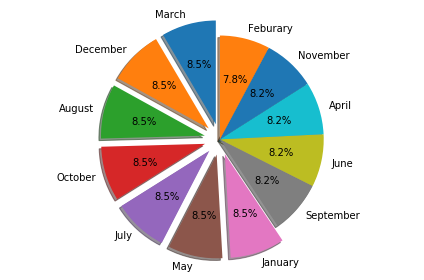

In [35]:
#Pie chart of Month attribute
df = pd.DataFrame(BikeData['Month'])
df['Month'] = df.replace([1],"January")
df['Month'] = df.replace([2],"Feburary")
df['Month'] = df.replace([3],"March")
df['Month'] = df.replace([4],"April")
df['Month'] = df.replace([5],"May")
df['Month'] = df.replace([6],"June")
df['Month'] = df.replace([7],"July")
df['Month'] = df.replace([8],"August")
df['Month'] = df.replace([9],"September")
df['Month'] = df.replace([10],"October")
df['Month'] = df.replace([11],"November")
df['Month'] = df.replace([12],"December")
df = pd.value_counts(df.Month).to_frame().reset_index()
df.columns = ['Month','Count']
plt.pie(
    df['Count'],
    labels=df['Month'],
    shadow=True,
    explode=(0.15,0.15, 0.15,0.15,0.15,0.15,0.15,0,0,0,0,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

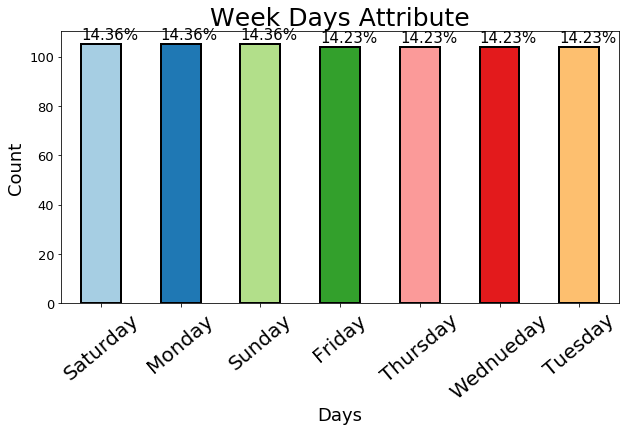

In [36]:
#univariate analysis of categorical attribute Week Day
ax = BikeData['WeekDay'].value_counts().plot(kind='bar',figsize=(10,5),fontsize=13,color=sns.color_palette("Paired", 7),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Week Days Attribute", fontsize=25)
ax.set_xlabel("Days", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
ax.set_xticklabels(labels =["Saturday","Monday","Sunday","Friday","Thursday","Wednueday","Tuesday"], rotation=40, fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0, i.get_height()+2, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

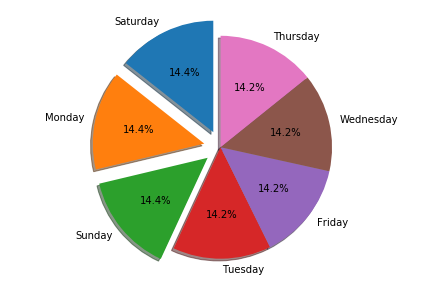

In [37]:
#Pie chart of Week Day
df = pd.DataFrame(BikeData['WeekDay'])
df['WeekDay'] = df.replace([0],"Sunday")
df['WeekDay'] = df.replace([1],"Monday")
df['WeekDay'] = df.replace([2],"Tuesday")
df['WeekDay'] = df.replace([3],"Wednesday")
df['WeekDay'] = df.replace([4],"Thursday")
df['WeekDay'] = df.replace([5],"Friday")
df['WeekDay'] = df.replace([6],"Saturday")
df = pd.value_counts(df.WeekDay).to_frame().reset_index()
df.columns = ['Day','Count']
plt.pie(
    df['Count'],
    labels=df['Day'],
    shadow=True,
    explode=(0.15,0.15,0.15,0,0,0,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

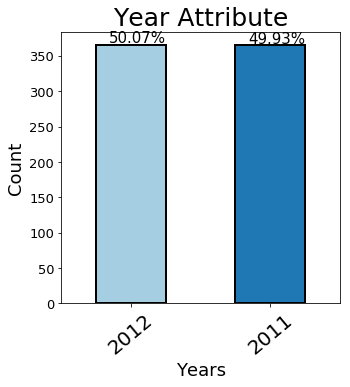

In [38]:
#univariate analsis of categorical attribute Year
ax = BikeData['Year'].value_counts().plot(kind='bar',figsize=(5,5),fontsize=13,color=sns.color_palette("Paired", 7),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Year Attribute", fontsize=25)
ax.set_xlabel("Years", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
ax.set_xticklabels(labels =["2012","2011"], rotation=40, fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.09, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

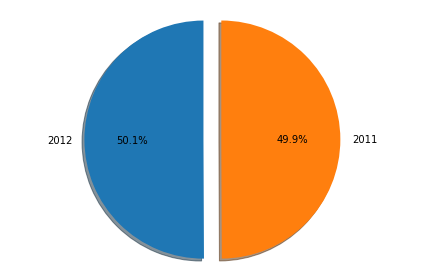

In [39]:
#Pie chart of year attribute
df = pd.DataFrame(BikeData['Year'])
df['Year'] = df.replace([0],"2011")
df['Year'] = df.replace([1],"2012")
df = pd.value_counts(df.Year).to_frame().reset_index()
df.columns = ['Year','Count']
plt.pie(
    df['Count'],
    labels=df['Year'],
    shadow=True,
    explode=(0.15,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

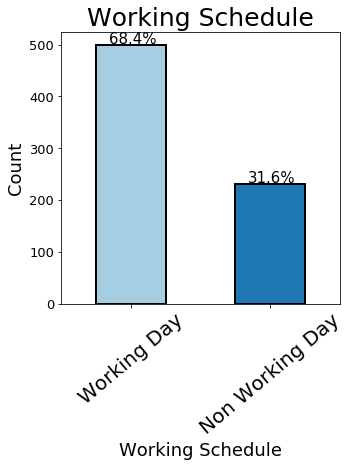

In [40]:
#univariate analsis of categorical attribute Year
ax = BikeData['WorkingDay'].value_counts().plot(kind='bar',figsize=(5,5),fontsize=13,color=sns.color_palette("Paired", 7),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Working Schedule", fontsize=25)
ax.set_xlabel("Working Schedule", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
ax.set_xticklabels(labels =["Working Day","Non Working Day"], rotation=40, fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.09, i.get_height()+3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

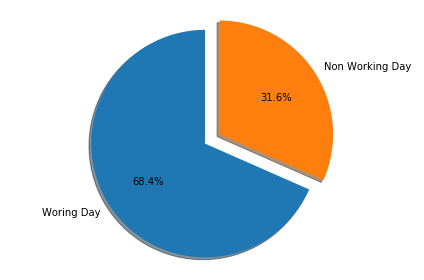

In [41]:
#pie chart of Working Schedule
df = pd.DataFrame(BikeData['WorkingDay'])
df['WorkingDay'] = df.replace([0],"Non Working Day")
df['WorkingDay'] = df.replace([1],"Woring Day")
df = pd.value_counts(df.WorkingDay).to_frame().reset_index()
df.columns = ['WorkingDay','Count']
plt.pie(
    df['Count'],
    labels=df['WorkingDay'],
    shadow=True,
    explode=(0.15,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

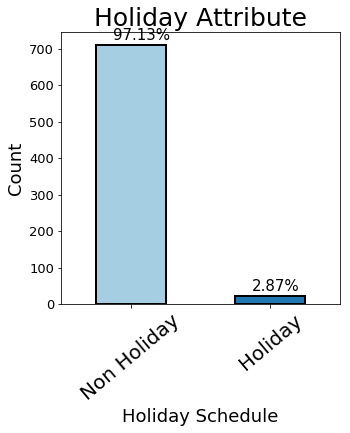

In [42]:
#univariate analsis of categorical attribute Holiday
ax = BikeData['Holiday'].value_counts().plot(kind='bar',figsize=(5,5),fontsize=13,color=sns.color_palette("Paired", 7),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Holiday Attribute", fontsize=25)
ax.set_xlabel("Holiday Schedule", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
ax.set_xticklabels(labels =["Non Holiday","Holiday"], rotation=40, fontsize=20)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.12, i.get_height()+15, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

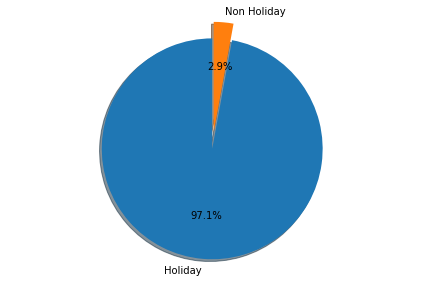

In [43]:
#Pie chart of Holiday variable
df = pd.DataFrame(BikeData['Holiday'])
df['Holiday'] = df.replace([0],"Holiday")
df['Holiday'] = df.replace([1],"Non Holiday")
df = pd.value_counts(df.Holiday).to_frame().reset_index()
df.columns = ['Holiday','Count']
plt.pie(
    df['Count'],
    labels=df['Holiday'],
    shadow=True,
    explode=(0.15,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

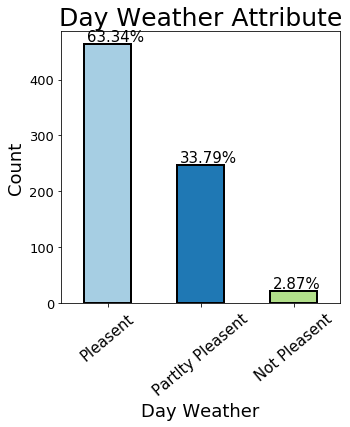

In [44]:
#univariate analsis of categorical attribute Day Weather
ax = BikeData['DayWeather'].value_counts().plot(kind='bar',figsize=(5,5),fontsize=13,color=sns.color_palette("Paired", 7),align='center',edgecolor='black',linewidth=2)
ax.set_alpha(1)
ax.set_title("Day Weather Attribute", fontsize=25)
ax.set_xlabel("Day Weather", fontsize=18);
ax.set_ylabel("Count", fontsize=18);
ax.set_xticklabels(labels =["Pleasent","Partlty Pleasent","Not Pleasent"], rotation=40, fontsize=15)
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+0.03, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')

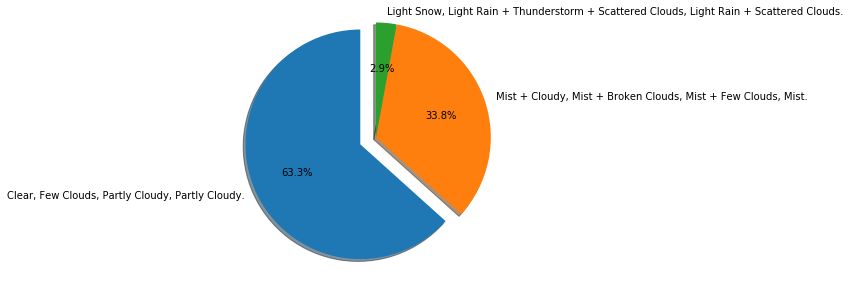

In [45]:
#Pie chart of Day weather variable
df = pd.DataFrame(BikeData['DayWeather'])
df['DayWeather'] = df.replace([1],"Clear, Few Clouds, Partly Cloudy, Partly Cloudy.")
df['DayWeather'] = df.replace([2],"Mist + Cloudy, Mist + Broken Clouds, Mist + Few Clouds, Mist.")
df['DayWeather'] = df.replace([3],"Light Snow, Light Rain + Thunderstorm + Scattered Clouds, Light Rain + Scattered Clouds.")
df = pd.value_counts(df.DayWeather).to_frame().reset_index()
df.columns = ['Weather','Count']
plt.pie(
    df['Count'],
    labels=df['Weather'],
    shadow=True,
    explode=(0.15,0,0),
    startangle=90,
    autopct='%1.1f%%'
    )
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Rented Bikes V/S Temperature')

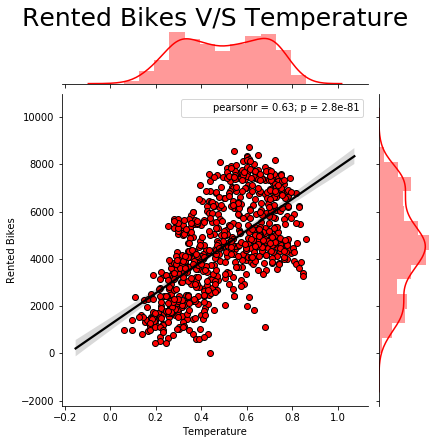

In [47]:
#Relation between Numerical Variable 'Temperature' and Bikes Rented 
BikeData['Temperature'].value_counts()
BikeData['RentedBikes'].value_counts()
ax = sns.jointplot("Temperature","RentedBikes",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Temperature")
plt.ylabel("Rented Bikes")
plt.title("Rented Bikes V/S Temperature",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Rented Bikes V/S Feeling Temperature')

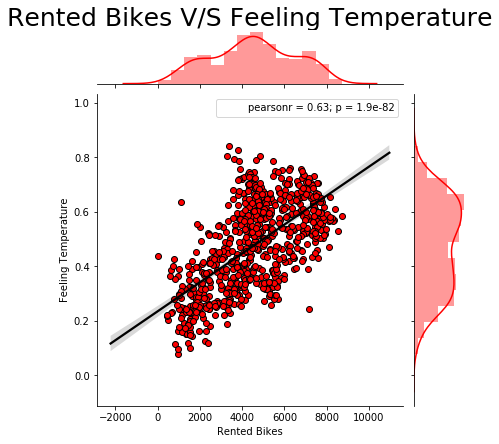

In [48]:
#Relation between Numerical Variable 'Rented Bikes' and  'Feeling Temperature'
BikeData['RentedBikes'].value_counts()
BikeData['FeelingTemperature'].value_counts()
ax = sns.jointplot("RentedBikes","FeelingTemperature",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Rented Bikes")
plt.ylabel("Feeling Temperature")
plt.title("Rented Bikes V/S Feeling Temperature",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Rented Bikes V/S Humidity')

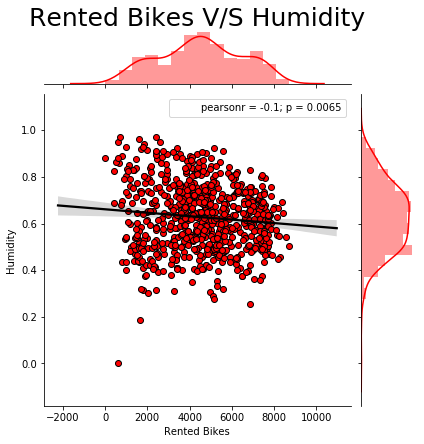

In [49]:
#Relation between Numerical Variable 'Rented Bikes' and  'Humidity'
BikeData['RentedBikes'].value_counts()
BikeData['Humidity'].value_counts()
ax=sns.jointplot("RentedBikes","Humidity",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Rented Bikes")
plt.ylabel("Humidity ")
plt.title("Rented Bikes V/S Humidity",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Rented Bikes V/S Wind Speed')

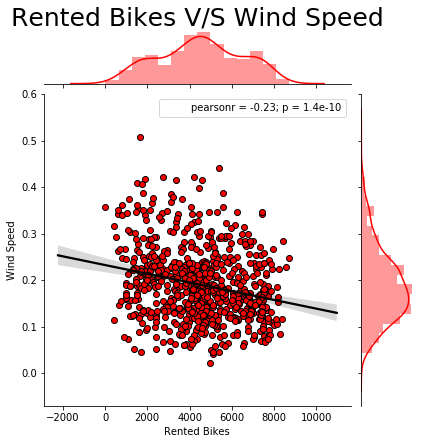

In [50]:
#Relation between Numerical Variable 'Rented Bikes' and  'Wind Speed
BikeData['RentedBikes'].value_counts()
BikeData['WindSpeed'].value_counts()
ax = sns.jointplot("RentedBikes","WindSpeed",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Rented Bikes")
plt.ylabel("Wind Speed")
plt.title("Rented Bikes V/S Wind Speed",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Rented Bikes V/S Casual Users')

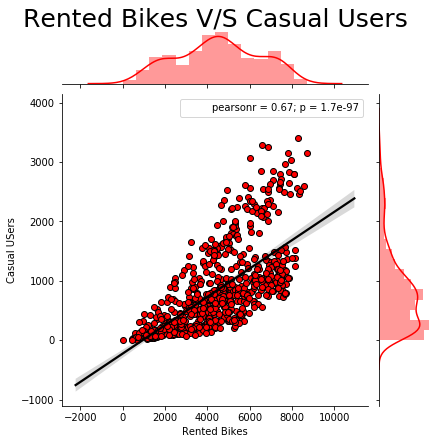

In [51]:
#Relation between Numerical Variable 'Rented Bikes' and  'Casual Users'
BikeData['RentedBikes'].value_counts()
BikeData['CasualUsers'].value_counts()
ax = sns.jointplot("RentedBikes","CasualUsers",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Rented Bikes")
plt.ylabel("Casual USers")
plt.title("Rented Bikes V/S Casual Users",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Rented Bikes V/S Registered Users')

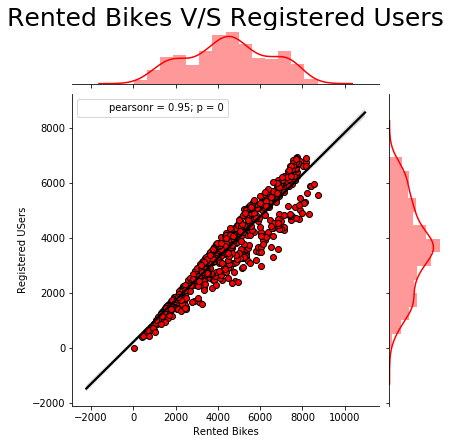

In [52]:
#Relation between Numerical Variable 'Rented Bikes' and  'Registered Users'
BikeData['RentedBikes'].value_counts()
BikeData['RegisteredUsers'].value_counts()
ax = sns.jointplot("RentedBikes","RegisteredUsers",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Rented Bikes")
plt.ylabel("Registered USers")
plt.title("Rented Bikes V/S Registered Users",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Temperature V/S Feeling Temeprature')

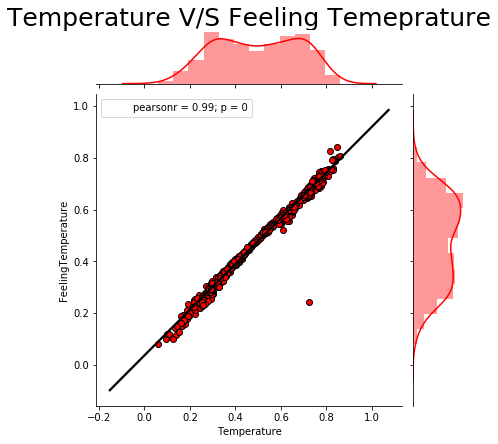

In [53]:
#Relation between Numerical Variable 'Temperature' and  'Feeling Temeperature'
BikeData['Temperature'].value_counts()
BikeData['FeelingTemperature'].value_counts()
ax=sns.jointplot("Temperature","FeelingTemperature",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Temperature")
plt.ylabel("FeelingTemperature")
plt.title("Temperature V/S Feeling Temeprature",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Temperature V/S Humidity')

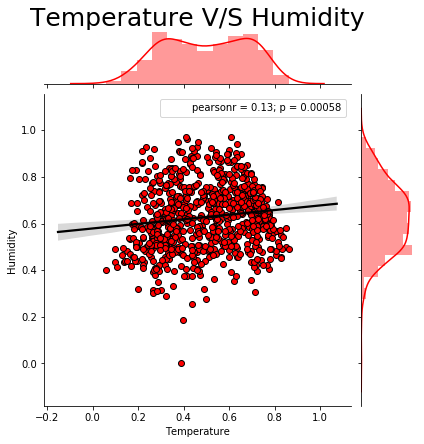

In [54]:
#Relation between Numerical Variable 'Temperature' and  'Humidity'
BikeData['Temperature'].value_counts()
BikeData['Humidity'].value_counts()
ax =sns.jointplot("Temperature","Humidity",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title("Temperature V/S Humidity",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Temperature V/S Wind Speed')

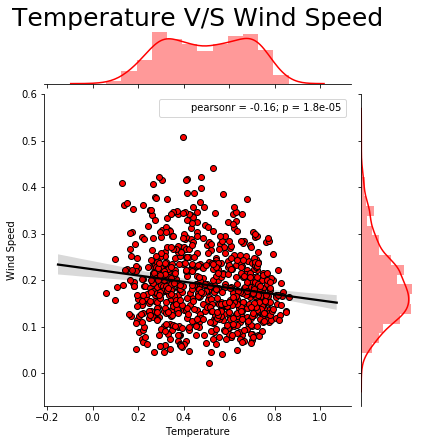

In [55]:
#Relation between Numerical Variable 'Temperature' and  'Wind Speed'
BikeData['Temperature'].value_counts()
BikeData['WindSpeed'].value_counts()
ax =sns.jointplot("Temperature","WindSpeed",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Temperature")
plt.ylabel("Wind Speed")
plt.title("Temperature V/S Wind Speed",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Temperature V/S Casual Users')

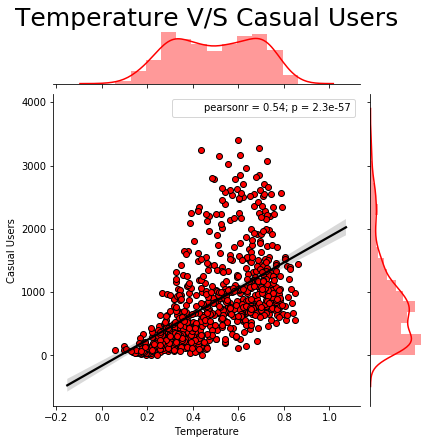

In [56]:
#Relation between Numerical Variable 'Temperature' and  'Casual Users'
BikeData['Temperature'].value_counts()
BikeData['CasualUsers'].value_counts()
ax =sns.jointplot("Temperature","CasualUsers",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Temperature")
plt.ylabel("Casual Users")
plt.title("Temperature V/S Casual Users",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Temperature V/S Registered Users')

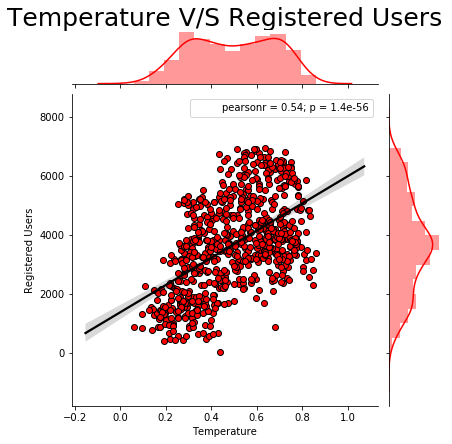

In [57]:
#Relation between Numerical Variable 'Temperature' and  'Registered Users'
BikeData['Temperature'].value_counts()
BikeData['RegisteredUsers'].value_counts()
ax = sns.jointplot("Temperature","RegisteredUsers",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Temperature")
plt.ylabel("Registered Users")
plt.title("Temperature V/S Registered Users",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Feeling Temperature V/S Humidity')

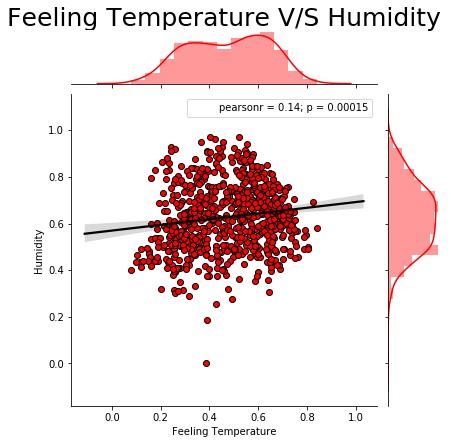

In [33]:
#Relation between Numerical Variable 'Feeling Temperature' and  'Humidity'
BikeData['FeelingTemperature'].value_counts()
BikeData['Humidity'].value_counts()
ax = sns.jointplot("FeelingTemperature","Humidity",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Feeling Temperature")
plt.ylabel("Humidity")
plt.title("Feeling Temperature V/S Humidity",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Feeling Temperature V/S Wind Speed')

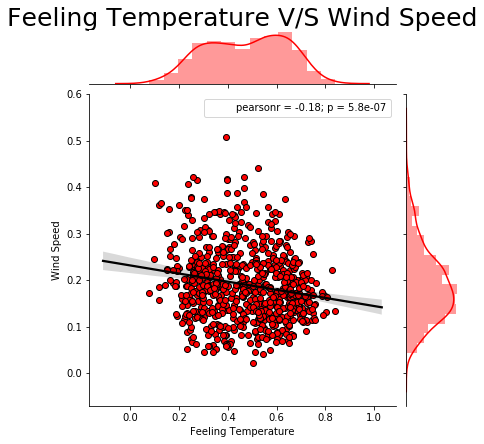

In [58]:
#Relation between Numerical Variable 'Feeling Temperature' and  'Wind Speed'
BikeData['FeelingTemperature'].value_counts()
BikeData['WindSpeed'].value_counts()
ax = sns.jointplot("FeelingTemperature","WindSpeed",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Feeling Temperature")
plt.ylabel("Wind Speed")
plt.title("Feeling Temperature V/S Wind Speed",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Feeling Temperature V/S Casual Users')

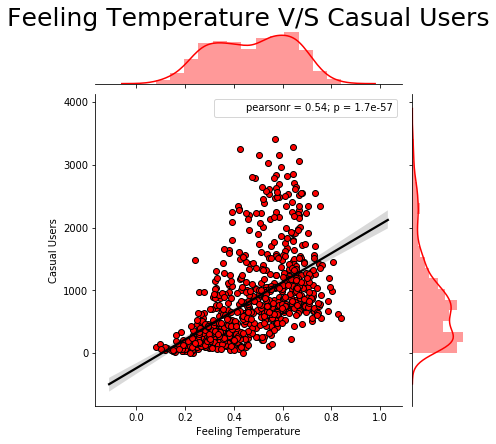

In [59]:
#Relation between Numerical Variable 'Feeling Temperature' and  'Casual Users'
BikeData['FeelingTemperature'].value_counts()
BikeData['CasualUsers'].value_counts()
ax = sns.jointplot("FeelingTemperature","CasualUsers",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Feeling Temperature")
plt.ylabel("Casual Users")
plt.title("Feeling Temperature V/S Casual Users",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Feeling Temperature V/S Registered Users')

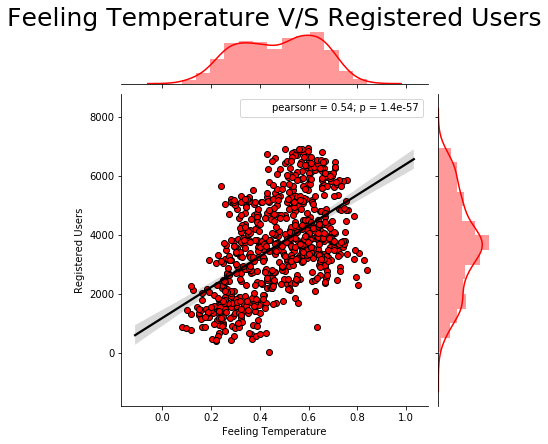

In [60]:
#Relation between Numerical Variable 'Feeling Temperature' and  'Registered Users'
BikeData['FeelingTemperature'].value_counts()
BikeData['RegisteredUsers'].value_counts()
ax = sns.jointplot("FeelingTemperature","RegisteredUsers",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Feeling Temperature")
plt.ylabel("Registered Users")
plt.title("Feeling Temperature V/S Registered Users",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Humidity V/S Wind Speed')

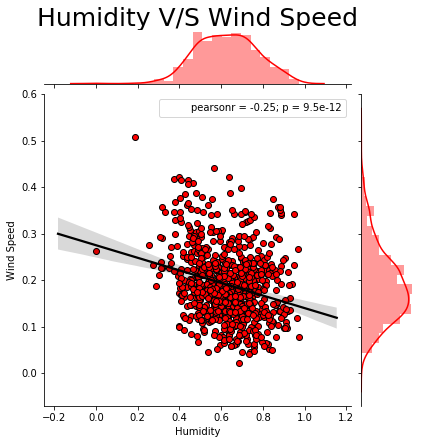

In [61]:
#Relation between Numerical Variable 'Humidity' and  'Wind Speed'
BikeData['Humidity'].value_counts()
BikeData['WindSpeed'].value_counts()
ax = sns.jointplot("Humidity","WindSpeed",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Humidity")
plt.ylabel("Wind Speed")
plt.title("Humidity V/S Wind Speed",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Humidity V/S Casual Users')

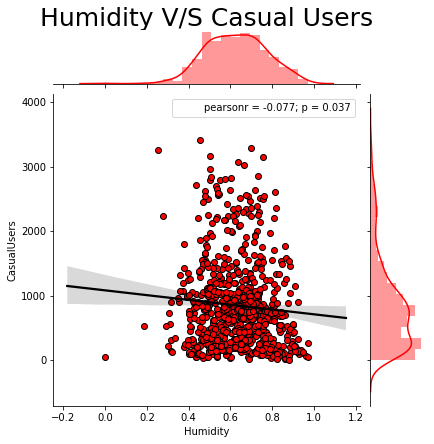

In [62]:
#Relation between Numerical Variable 'Humidity' and  'Casual Users'
BikeData['Humidity'].value_counts()
BikeData['CasualUsers'].value_counts()
ax = sns.jointplot("Humidity","CasualUsers",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Humidity")
plt.ylabel("CasualUsers")
plt.title("Humidity V/S Casual Users",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Humidity V/S Registered Users')

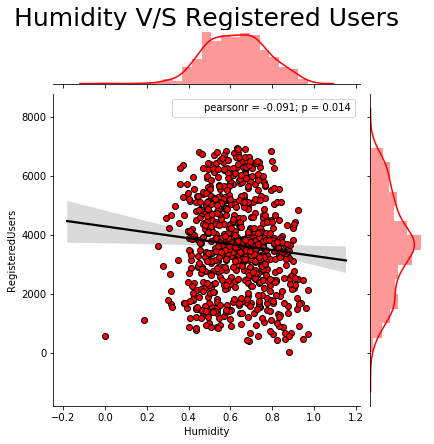

In [63]:
#Relation between Numerical Variable 'Humidity' and  'Registered Users'
BikeData['Humidity'].value_counts()
BikeData['RegisteredUsers'].value_counts()
ax=sns.jointplot("Humidity","RegisteredUsers",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Humidity")
plt.ylabel("RegisteredUsers")
plt.title("Humidity V/S Registered Users",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Wind Speed V/S Registered Users')

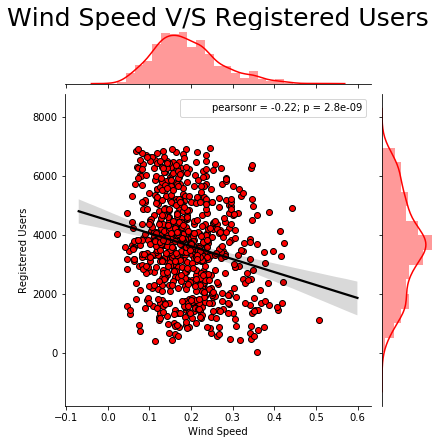

In [64]:
#Relation between Numerical Variable 'Wind Speed' and  'Registered Users'
BikeData['WindSpeed'].value_counts()
BikeData['RegisteredUsers'].value_counts()
ax = sns.jointplot("WindSpeed","RegisteredUsers",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Wind Speed")
plt.ylabel("Registered Users")
plt.title("Wind Speed V/S Registered Users",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Wind Speed V/S Casual Users')

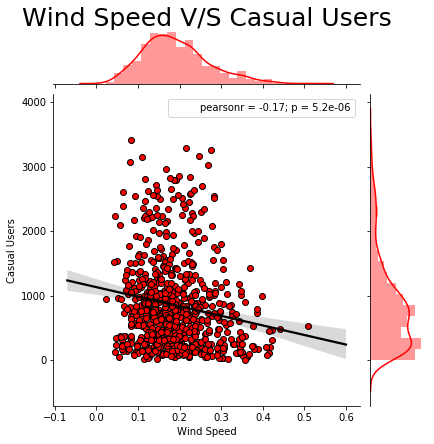

In [65]:
#Relation between Numerical Variable 'Wind Speed' and  'Casual Users'
BikeData['WindSpeed'].value_counts()
BikeData['CasualUsers'].value_counts()
ax = sns.jointplot("WindSpeed","CasualUsers",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Wind Speed")
plt.ylabel("Casual Users")
plt.title("Wind Speed V/S Casual Users",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Gursimran\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(0.5,1.2,'Casual Users V/S Registered Users')

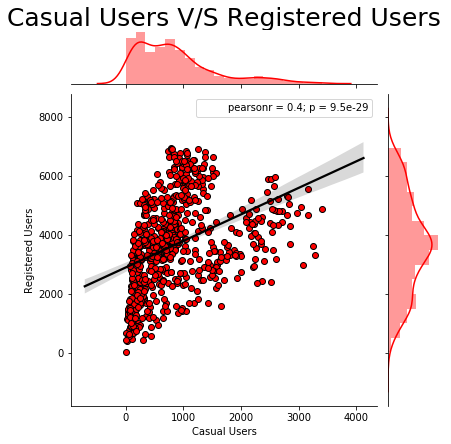

In [66]:
#Relation between Numerical Variable 'Casual Users' and  'Registered Users'
BikeData['CasualUsers'].value_counts()
BikeData['RegisteredUsers'].value_counts()
ax = sns.jointplot("CasualUsers","RegisteredUsers",data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'},kind='reg',joint_kws={'color':'black'})
ax.annotate(stats.pearsonr)
plt.xlabel("Casual Users")
plt.ylabel("Registered Users")
plt.title("Casual Users V/S Registered Users",x=0.5,y=1.2,fontsize=25)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


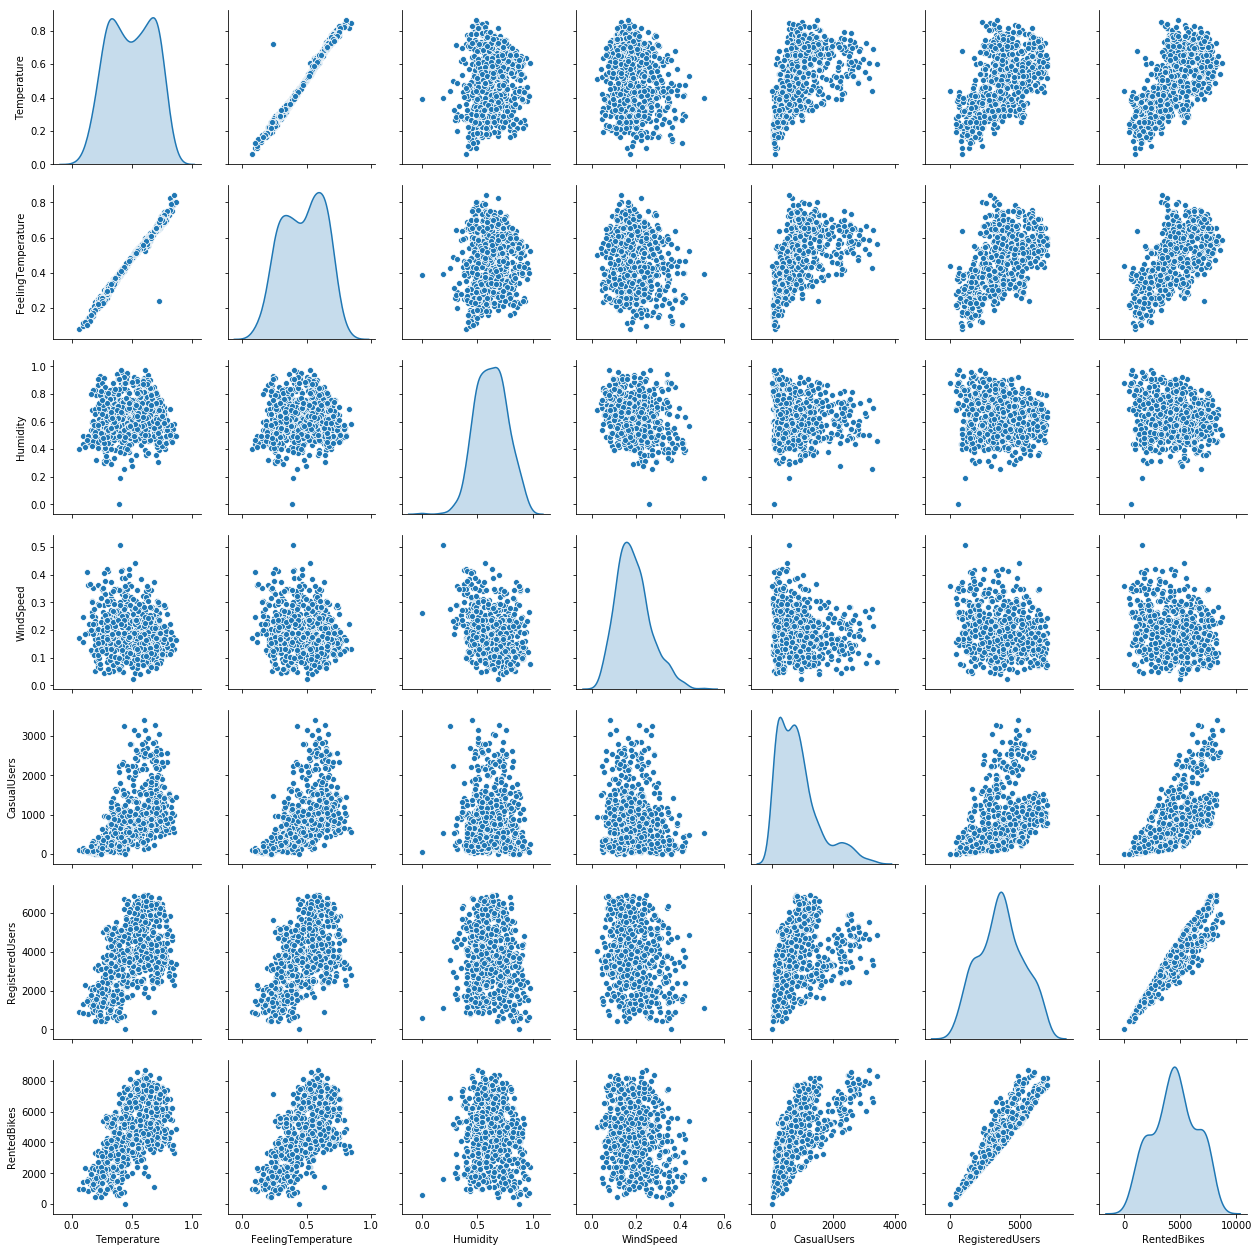

In [45]:
#Pairplot of all Numeric attribute
DataHist = BikeData.drop(['Index', 'Date','Season','WeekDay','Season','Year','Month','Holiday','WorkingDay','DayWeather'], axis=1)
sns.pairplot(DataHist,diag_kind="kde")


In [67]:
#Multivariate Analysis
# Define a function for a plot with two y axes
def lineplot2y(x_data, x_label, y1_data, y1_color, y1_label, y2_data, y2_color, y2_label, title):
    _, ax1 = plt.subplots()
    ax1.plot(x_data, y1_data, color = y1_color)
    ax1.set_ylabel(y1_label, color = y1_color)
    ax1.set_xlabel(x_label)
    ax1.set_title(title)
    ax2 = ax1.twinx()
    ax2.plot(x_data, y2_data, color = y2_color)
    ax2.set_ylabel(y2_label, color = y2_color)
    ax2.spines['right'].set_visible(True)

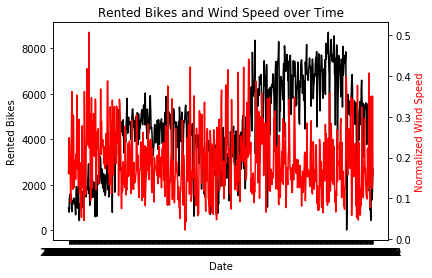

In [20]:
#Multivariate analysis among Date, Rented Bikes and Wind Speed
#Calling function
lineplot2y(x_data = BikeData['Date1']
           , x_label = 'Date'
           , y1_data = BikeData['RentedBikes']
           , y1_color = 'black'
           , y1_label = 'Rented Bikes'
           , y2_data = BikeData['WindSpeed']
           , y2_color = 'red'
           , y2_label = 'Normalized Wind Speed'
           , title = 'Rented Bikes and Wind Speed over Time')

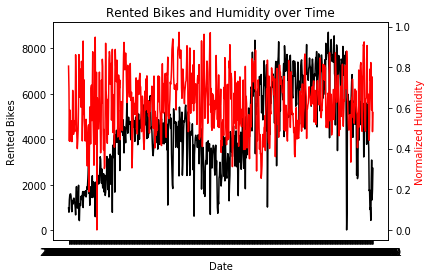

In [19]:
#Multivariate analysis among Date, Rented Bikes and Humidity
#Calling function
lineplot2y(x_data = BikeData['Date1']
           , x_label = 'Date'
           , y1_data = BikeData['RentedBikes']
           , y1_color = 'black'
           , y1_label = 'Rented Bikes'
           , y2_data = BikeData['Humidity']
           , y2_color = 'red'
           , y2_label = 'Normalized Humidity'
           , title = 'Rented Bikes and Humidity over Time')

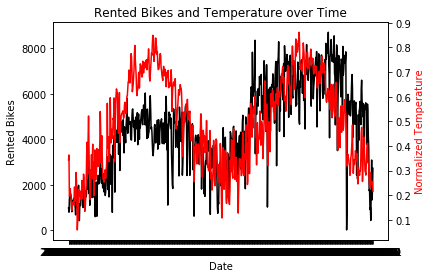

In [23]:
#Multivariate analysis among Date, Rented Bikes and Temperature
#Calling function
lineplot2y(x_data = BikeData['Date1']
           , x_label = 'Date'
           , y1_data = BikeData['RentedBikes']
           , y1_color = 'black'
           , y1_label = 'Rented Bikes'
           , y2_data = BikeData['Temperature']
           , y2_color = 'red'
           , y2_label = 'Normalized Temperature'
           , title = 'Rented Bikes and Temperature over Time')

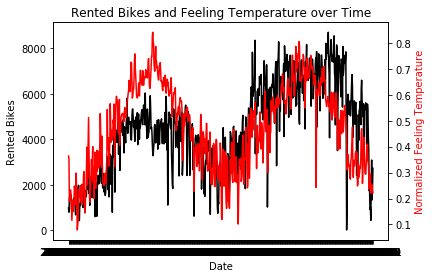

In [22]:
#Multivariate analysis among Date, Rented Bikes and Feeling Temperature
#Calling function
lineplot2y(x_data = BikeData['Date1']
           , x_label = 'Date'
           , y1_data = BikeData['RentedBikes']
           , y1_color = 'black'
           , y1_label = 'Rented Bikes'
           , y2_data = BikeData['FeelingTemperature']
           , y2_color = 'red'
           , y2_label = 'Normalized Feeling Temperature'
           , title = 'Rented Bikes and Feeling Temperature over Time')

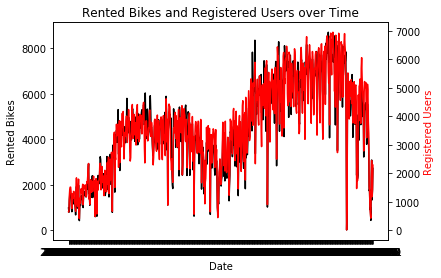

In [24]:
#Multivariate analysis among Date, Rented Bikes and Registered Users
#Calling function
lineplot2y(x_data = BikeData['Date1']
           , x_label = 'Date'
           , y1_data = BikeData['RentedBikes']
           , y1_color = 'black'
           , y1_label = 'Rented Bikes'
           , y2_data = BikeData['RegisteredUsers']
           , y2_color = 'red'
           , y2_label = 'Registered Users'
           , title = 'Rented Bikes and Registered Users over Time')

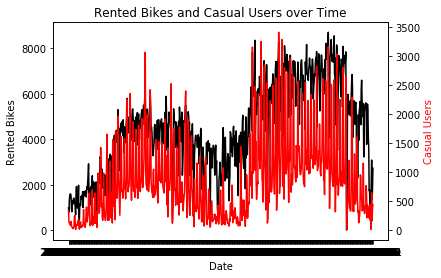

In [25]:
#Multivariate analysis among Date, Rented Bikes and Casual Users
#Calling function
lineplot2y(x_data = BikeData['Date1']
           , x_label = 'Date'
           , y1_data = BikeData['RentedBikes']
           , y1_color = 'black'
           , y1_label = 'Rented Bikes'
           , y2_data = BikeData['CasualUsers']
           , y2_color = 'red'
           , y2_label = 'Casual Users'
           , title = 'Rented Bikes and Casual Users over Time')

In [146]:
#Checking Missing Values
BikeData.isnull().values.any()

False

In [147]:
#Filling Missing values which is not present in case of this dataset
BikeData.fillna(BikeData.mean(), inplace=True)

In [148]:
#Checking null values
BikeData.isnull().any()

Index                 False
Date                  False
Season                False
Year                  False
Month                 False
Holiday               False
WeekDay               False
WorkingDay            False
DayWeather            False
Temperature           False
FeelingTemperature    False
Humidity              False
WindSpeed             False
CasualUsers           False
RegisteredUsers       False
RentedBikes           False
dtype: bool

In [149]:
#Getting sum of all null values
BikeData.isnull().sum()

Index                 0
Date                  0
Season                0
Year                  0
Month                 0
Holiday               0
WeekDay               0
WorkingDay            0
DayWeather            0
Temperature           0
FeelingTemperature    0
Humidity              0
WindSpeed             0
CasualUsers           0
RegisteredUsers       0
RentedBikes           0
dtype: int64

Text(0.5,1,'Outliers Detection in Rented Bikes Attribute')

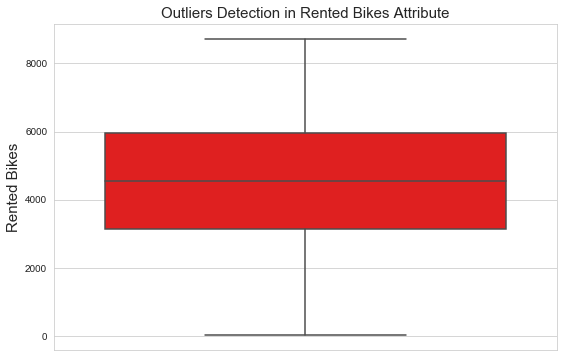

In [29]:
#Outliers Detection using Box PLot Method.
#Detecting outliers for Target Variable i.e. "Rented Bikes"
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="RentedBikes", data=BikeData,orient="v",color='red')
plt.ylabel("Rented Bikes",fontsize=15)
plt.title("Outliers Detection in Rented Bikes Attribute",fontsize=15)

Text(0.5,1,'Outliers Detection in Temperature Attribute')

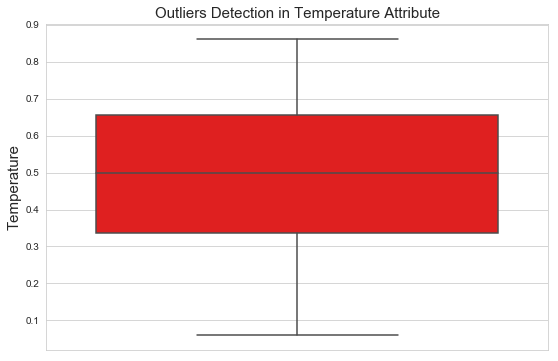

In [30]:
#Detecting outliers for Target Variable i.e. "Temperature"
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="Temperature", data=BikeData,orient="v",color='red')
plt.ylabel("Temperature",fontsize=15)
plt.title("Outliers Detection in Temperature Attribute",fontsize=15)

Text(0.5,1,'Outliers Detection in Feeling Temperature Attribute')

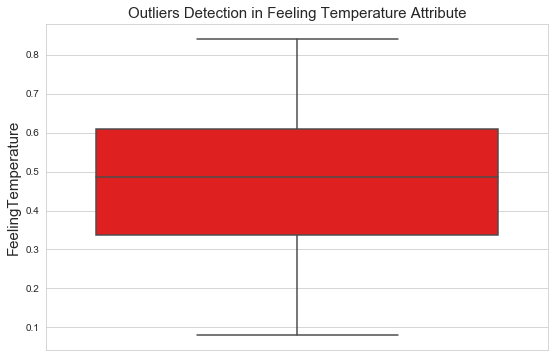

In [31]:
#Detecting outliers for Target Variable i.e. "Feeling Temperature"
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="FeelingTemperature", data=BikeData,orient="v",color='red')
plt.ylabel("FeelingTemperature",fontsize=15)
plt.title("Outliers Detection in Feeling Temperature Attribute",fontsize=15)

Text(0.5,1,'Outliers Detection in Humidity Attribute')

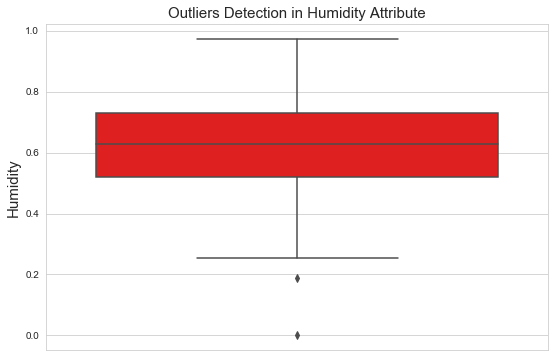

In [47]:
#Detecting outliers for Target Variable i.e. "Humidity"
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="Humidity", data=BikeData,orient="v",color='red')
plt.ylabel("Humidity",fontsize=15)
plt.title("Outliers Detection in Humidity Attribute",fontsize=15)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


-0.10065856213715527

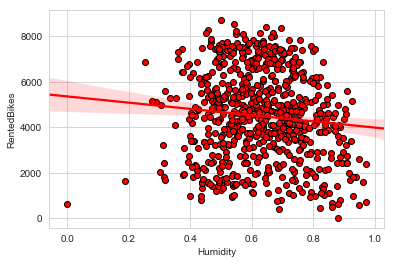

In [48]:
#Regression plot between Humidity and Rented Bikes
sns.regplot(x="Humidity", y="RentedBikes", data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'});
#Correlation
BikeData['RentedBikes'].corr(BikeData['Humidity'])

0.20468725
1.0455212500000002


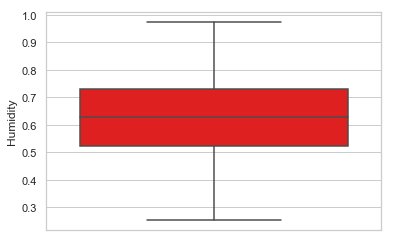

In [49]:
Name = ['Humidity']
for i in Name:
    q75, q25 = np.percentile(BikeData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

BikeDataCopy = BikeData.copy()

BikeDataCopy = BikeDataCopy.drop(BikeDataCopy[BikeDataCopy.loc[:,i] < min].index)
BikeDataCopy = BikeDataCopy.drop(BikeDataCopy[BikeDataCopy.loc[:,'Humidity'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
 #tips = sns.load_dataset("tips")
ax = sns.boxplot(x="Humidity", data=BikeDataCopy,orient="v",color='red')

BikeData = BikeDataCopy

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


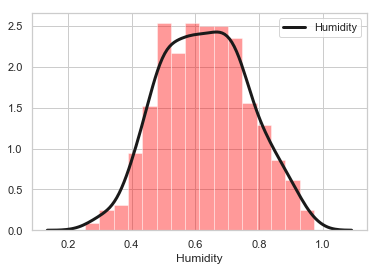

In [50]:
 
sns.distplot(BikeData['Humidity'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Humidity"})   


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


-0.12203925129240463

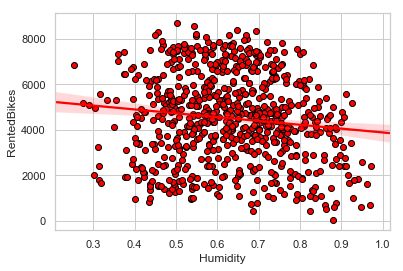

In [51]:
#Regression plot between Humidity and Rented Bikes after removing outliers.
sns.regplot(x="Humidity", y="RentedBikes", data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'});
#Correlation
BikeData['RentedBikes'].corr(BikeData['Humidity'])

Text(0.5,1,'Outliers Detection in WindSpeed Attribute')

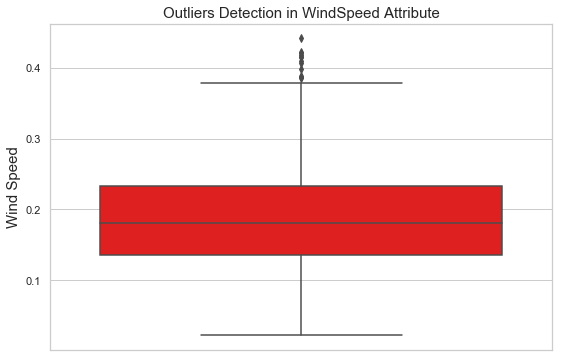

In [52]:
#Detecting outliers for Target Variable i.e. "WindSpeed"
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="WindSpeed", data=BikeData,orient="v",color='red')
plt.ylabel("Wind Speed",fontsize=15)
plt.title("Outliers Detection in WindSpeed Attribute",fontsize=15)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


-0.2274047531235313

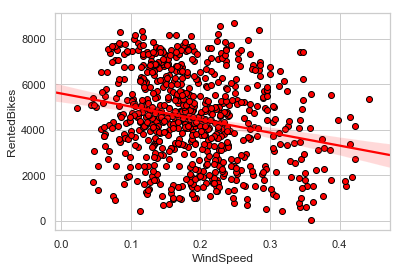

In [53]:
#Regression plot between Wind Speed and Rented Bikes
sns.regplot(x="WindSpeed", y="RentedBikes", data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'});
#Correlation
BikeData['RentedBikes'].corr(BikeData['WindSpeed'])

-0.012431000000000025
0.380585


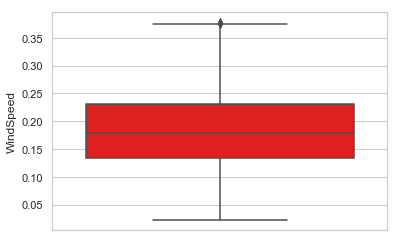

In [54]:
Name = ['WindSpeed']
for i in Name:
    q75, q25 = np.percentile(BikeData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

BikeDataCopy = BikeData.copy()

BikeDataCopy = BikeDataCopy.drop(BikeDataCopy[BikeDataCopy.loc[:,i] < min].index)
BikeDataCopy = BikeDataCopy.drop(BikeDataCopy[BikeDataCopy.loc[:,'WindSpeed'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
ax = sns.boxplot(x="WindSpeed", data=BikeDataCopy,orient="v",color='red')
BikeData = BikeDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


-0.2161932882927355

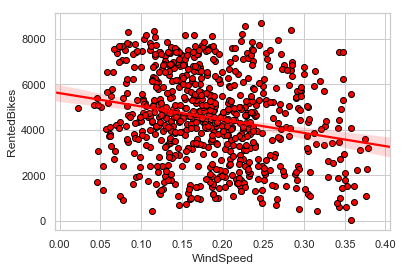

In [56]:
#Regression plot between Wind Speed and Rented Bikes after removing outliers
sns.regplot(x="WindSpeed", y="RentedBikes", data=BikeDataCopy,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'});
#Correlation
BikeDataCopy['RentedBikes'].corr(BikeDataCopy['WindSpeed'])

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


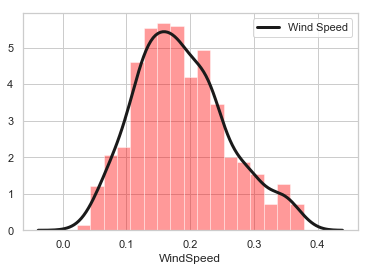

In [59]:
 
sns.distplot(BikeData['WindSpeed'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Wind Speed"})   


Text(0.5,1,'Outliers Detection in Casual Users Attribute')

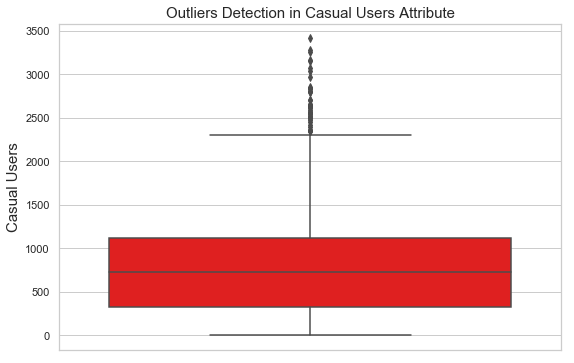

In [60]:
#Detecting outliers for Target Variable i.e. "Casual Users"
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="CasualUsers", data=BikeData,orient="v",color='red')
plt.ylabel("Casual Users",fontsize=15)
plt.title("Outliers Detection in Casual Users Attribute",fontsize=15)

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.9999999999999998

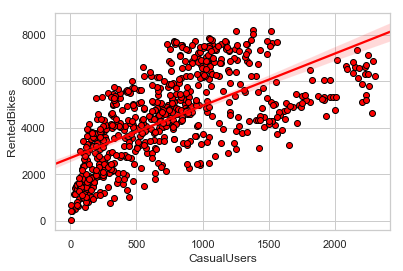

In [64]:
#Regression plot between Casual Users and Rented Bikes
sns.regplot(x="CasualUsers", y="RentedBikes", data=BikeData,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'});
#Correlation
BikeData['CasualUsers'].corr(BikeData['CasualUsers'])

-885.0
2323.0


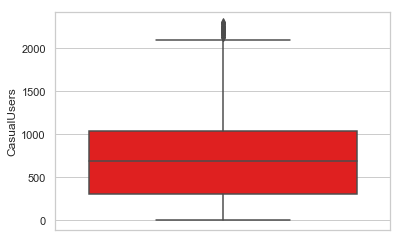

In [62]:
Name = ['CasualUsers']
for i in Name:
    q75, q25 = np.percentile(BikeData.loc[:,i], [75 ,25])
    iqr = q75 - q25
     
min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
        
print(min)
print(max)

BikeDataCopy = BikeData.copy()

BikeDataCopy = BikeDataCopy.drop(BikeDataCopy[BikeDataCopy.loc[:,i] < min].index)
BikeDataCopy = BikeDataCopy.drop(BikeDataCopy[BikeDataCopy.loc[:,'CasualUsers'] > max].index)

# Boxplot for casual after  aoutlier removal

sns.set(style="whitegrid")
ax = sns.boxplot(x="CasualUsers", data=BikeDataCopy,orient="v",color='red')
BikeData = BikeDataCopy


C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.6400803033164671

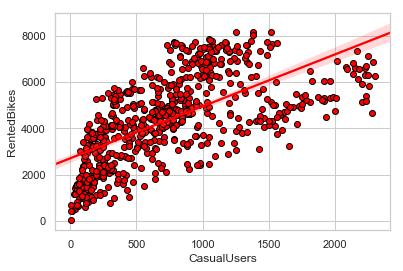

In [63]:
#Regression plot between Wind Speed and Rented Bikes after removing outliers
sns.regplot(x="CasualUsers", y="RentedBikes", data=BikeDataCopy,color='red',scatter_kws={'color':'red','alpha':1,'edgecolors':'black'});
#Correlation
BikeDataCopy['RentedBikes'].corr(BikeDataCopy['CasualUsers'])

C:\Users\Gursimran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


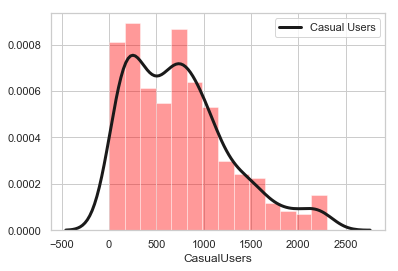

In [65]:
sns.distplot(BikeData['CasualUsers'],color='red',kde_kws={"color": "k", "lw": 3, "label": "Casual Users"})  

Text(0.5,1,'Outliers Detection in Registered Users Attribute')

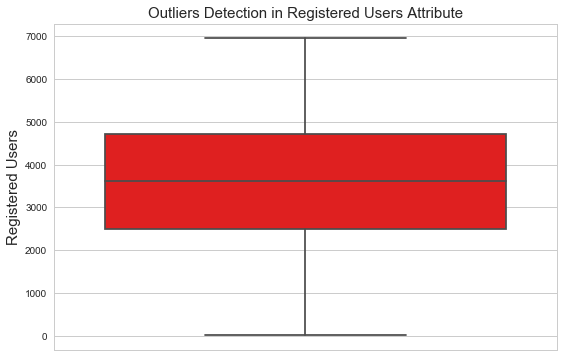

In [187]:
#Detecting outliers for Target Variable i.e. "Registered Users"
sns.set_style("whitegrid") 
fig = plt.figure(1, figsize=(9, 6))
ax = sns.boxplot(x="RegisteredUsers", data=BikeData,orient="v",color='red')
plt.ylabel("Registered Users",fontsize=15)
plt.title("Outliers Detection in Registered Users Attribute",fontsize=15)

In [188]:

BikeData.head()


Index        Date  Season  Year  Month  Holiday  WeekDay  WorkingDay  \
0      1  2011-01-01       1     0      1        0        6           0   
1      2  2011-01-02       1     0      1        0        0           0   
2      3  2011-01-03       1     0      1        0        1           1   
3      4  2011-01-04       1     0      1        0        2           1   
4      5  2011-01-05       1     0      1        0        3           1   

   DayWeather  Temperature  FeelingTemperature  Humidity  WindSpeed  \
0           2     0.344167            0.363625  0.805833   0.160446   
1           2     0.363478            0.353739  0.696087   0.248539   
2           1     0.196364            0.189405  0.437273   0.248309   
3           1     0.200000            0.212122  0.590435   0.160296   
4           1     0.226957            0.229270  0.436957   0.186900   

   CasualUsers  RegisteredUsers  RentedBikes  
0          331              654          985  
1          131              670          801  
2          120             1229         1349  
3          108             1454         1562  
4           82             1518         1600

In [18]:
#Feature Selection
#Selection of numerical feature  based  on pearson corelation 
BikeDataNumeric = BikeData.loc[:,['Temperature','FeelingTemperature','Humidity','WindSpeed','CasualUsers','RegisteredUsers','RentedBikes']]



In [24]:
#Draw  correlation matrix between all  numeric variables and analyse  what are the variables are important

temp = BikeDataNumeric.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

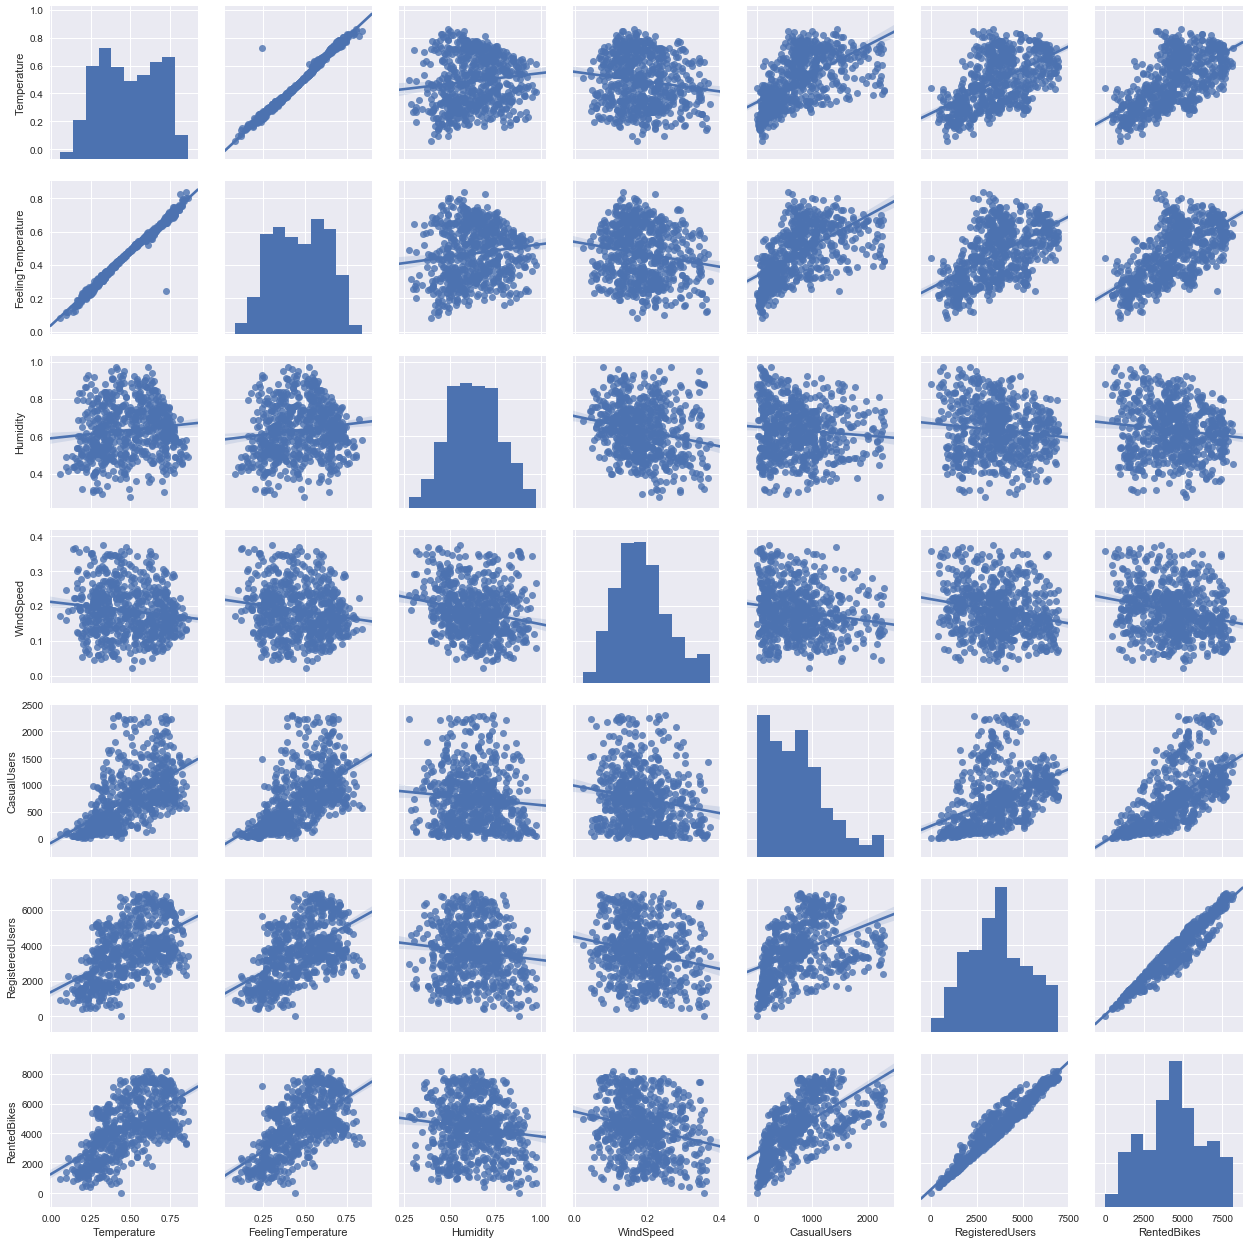

In [191]:
# check relationship with scatter plots
sns.set()
cols = ['Temperature', 'FeelingTemperature', 'Humidity', 'WindSpeed', 'CasualUsers', 'RegisteredUsers', 'RentedBikes']
sns.pairplot(BikeDataNumeric[cols], size = 2.5,kind="reg")
plt.show();



In [192]:
#As per scatter plots and above Correlation  graph there is strong relation 
# Independent variable   'Temperature' and 'Feeling Temperature'
# There is a   poor relation between  Independent variable 'Humidity' and dependent  variable 'Rented Bikes'

# so dropping two variables for feature selection

BikeDataNumeric = BikeDataNumeric.loc[:,['Temperature', 'WindSpeed', 'CasualUsers', 'RegisteredUsers', 'RentedBikes']]



In [193]:
BikeData['RegisteredUsers'].max()

6946

In [194]:
BikeDataNumeric.head()

Temperature  WindSpeed  CasualUsers  RegisteredUsers  RentedBikes
0     0.344167   0.160446          331              654          985
1     0.363478   0.248539          131              670          801
2     0.196364   0.248309          120             1229         1349
3     0.200000   0.160296          108             1454         1562
4     0.226957   0.186900           82             1518         1600

In [195]:
BikeDataNumeric.shape

(673, 5)

In [196]:
# Feature  Scaling
#Normality Check

cnames = ['CasualUsers','RegisteredUsers']
for i in cnames :
    print(i)
    BikeData[i] = (BikeData[i] - (BikeData[i]).min())/(BikeData[i].max() - (BikeData[i]).min())
BikeData.head()

CasualUsers
RegisteredUsers


Index        Date  Season  Year  Month  Holiday  WeekDay  WorkingDay  \
0      1  2011-01-01       1     0      1        0        6           0   
1      2  2011-01-02       1     0      1        0        0           0   
2      3  2011-01-03       1     0      1        0        1           1   
3      4  2011-01-04       1     0      1        0        2           1   
4      5  2011-01-05       1     0      1        0        3           1   

   DayWeather  Temperature  FeelingTemperature  Humidity  WindSpeed  \
0           2     0.344167            0.363625  0.805833   0.160446   
1           2     0.363478            0.353739  0.696087   0.248539   
2           1     0.196364            0.189405  0.437273   0.248309   
3           1     0.200000            0.212122  0.590435   0.160296   
4           1     0.226957            0.229270  0.436957   0.186900   

   CasualUsers  RegisteredUsers  RentedBikes  
0     0.143106         0.091539          985  
1     0.056111         0.093849          801  
2     0.051327         0.174560         1349  
3     0.046107         0.207046         1562  
4     0.034798         0.216286         1600

In [197]:
BikeData['RegisteredUsers'].min()

0.0

In [115]:
BikeData['RegisteredUsers'].max()


1.0

In [116]:
BikeData['CasualUsers'].min()

0.0

In [117]:
BikeData['CasualUsers'].max()

1.0

In [198]:
#Making Copy of BikeData before training models
BikeData1 = BikeData

In [213]:
#Feature Selection before Model development
#Dropping Feeling Temperatue becasue Temperature and Feeling Temeprature are higly correlated.
#Dropping Humidity because has low correlation related to Rented Bikes
#Date Variable is no use and will create problem while training models. So i am dropping it.

BikeData = BikeData.drop(['FeelingTemperature','Humidity','Date','Index'],axis=1)

In [214]:
BikeData.head()

Season  Year  Month  Holiday  WeekDay  WorkingDay  DayWeather  Temperature  \
0       1     0      1        0        6           0           2     0.344167   
1       1     0      1        0        0           0           2     0.363478   
2       1     0      1        0        1           1           1     0.196364   
3       1     0      1        0        2           1           1     0.200000   
4       1     0      1        0        3           1           1     0.226957   

   WindSpeed  CasualUsers  RegisteredUsers  RentedBikes  
0   0.160446     0.143106         0.091539          985  
1   0.248539     0.056111         0.093849          801  
2   0.248309     0.051327         0.174560         1349  
3   0.160296     0.046107         0.207046         1562  
4   0.186900     0.034798         0.216286         1600

In [80]:
#Splitting Target varible from the BikeData
BikeDataTarget = BikeData['RentedBikes']
BikeDataIndependent = BikeData.drop(['RentedBikes','Date1'],axis=1)

In [81]:
BikeDataIndependent

Index  Season  Year  Month  Holiday  WeekDay  WorkingDay  DayWeather  \
0        1       1     0      1        0        6           0           2   
1        2       1     0      1        0        0           0           2   
2        3       1     0      1        0        1           1           1   
3        4       1     0      1        0        2           1           1   
4        5       1     0      1        0        3           1           1   
5        6       1     0      1        0        4           1           1   
6        7       1     0      1        0        5           1           2   
7        8       1     0      1        0        6           0           2   
8        9       1     0      1        0        0           0           1   
9       10       1     0      1        0        1           1           1   
10      11       1     0      1        0        2           1           2   
11      12       1     0      1        0        3           1           1   
12      13       1     0      1        0        4           1           1   
13      14       1     0      1        0        5           1           1   
14      15       1     0      1        0        6           0           2   
15      16       1     0      1        0        0           0           1   
16      17       1     0      1        1        1           0           2   
17      18       1     0      1        0        2           1           2   
18      19       1     0      1        0        3           1           2   
19      20       1     0      1        0        4           1           2   
20      21       1     0      1        0        5           1           1   
21      22       1     0      1        0        6           0           1   
22      23       1     0      1        0        0           0           1   
23      24       1     0      1        0        1           1           1   
24      25       1     0      1        0        2           1           2   
25      26       1     0      1        0        3           1           3   
26      27       1     0      1        0        4           1           1   
27      28       1     0      1        0        5           1           2   
28      29       1     0      1        0        6           0           1   
29      30       1     0      1        0        0           0           1   
..     ...     ...   ...    ...      ...      ...         ...         ...   
701    702       4     1     12        0        0           0           2   
702    703       4     1     12        0        1           1           1   
703    704       4     1     12        0        2           1           1   
704    705       4     1     12        0        3           1           1   
705    706       4     1     12        0        4           1           1   
706    707       4     1     12        0        5           1           2   
707    708       4     1     12        0        6           0           2   
708    709       4     1     12        0        0           0           2   
709    710       4     1     12        0        1           1           2   
710    711       4     1     12        0        2           1           2   
711    712       4     1     12        0        3           1           2   
712    713       4     1     12        0        4           1           1   
713    714       4     1     12        0        5           1           1   
714    715       4     1     12        0        6           0           1   
715    716       4     1     12        0        0           0           2   
716    717       4     1     12        0        1           1           2   
717    718       4     1     12        0        2           1           1   
718    719       4     1     12        0        3           1           1   
719    720       4     1     12        0        4           1           2   
720    721       1     1     12        0        5           1           2   
7

In [82]:
BikeDataTarget

0       985
1       801
2      1349
3      1562
4      1600
5      1606
6      1510
7       959
8       822
9      1321
10     1263
11     1162
12     1406
13     1421
14     1248
15     1204
16     1000
17      683
18     1650
19     1927
20     1543
21      981
22      986
23     1416
24     1985
25      506
26      431
27     1167
28     1098
29     1096
       ... 
701    4649
702    6234
703    6606
704    5729
705    5375
706    5008
707    5582
708    3228
709    5170
710    5501
711    5319
712    5532
713    5611
714    5047
715    3786
716    4585
717    5557
718    5267
719    4128
720    3623
721    1749
722    1787
723     920
724    1013
725     441
726    2114
727    3095
728    1341
729    1796
730    2729
Name: RentedBikes, Length: 731, dtype: int64

In [83]:
#Splitting DataSet for Training and Testing Purpose
X_Train,X_Test,Y_Train,Y_Test = train_test_split(BikeDataIndependent,BikeDataTarget,test_size=0.3)

In [84]:
#Training Decision tree
DecisionTree = DecisionTreeRegressor(max_depth=3,random_state=0)
DecisionTree.fit(X_Train,Y_Train)
Score = DecisionTree.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = DecisionTree.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))


Coefficient of determination R^2 of the prediction.: 0.9304372307403382
Mean squared error: 356059.63
Test Variance score: 0.91


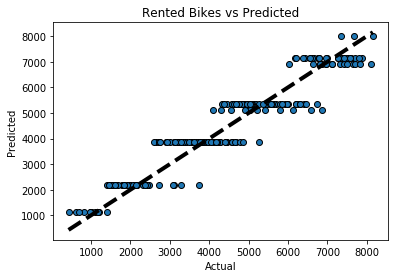

In [85]:
#So let's run the model against the test data
fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [86]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(Y_Test,Y_Predictions)

# Error  is getting  "11.686535163054272"
#Decison Tree with depth of 3 gives accuracy of 
#Accuracy = 100 - 11.68 = 88.32%

14.201018216974436

In [87]:
#Changing Depth of the tree to 5 inorder to deal with overfitting problem.
#Training Decision tree
DecisionTree = DecisionTreeRegressor(max_depth=5,random_state=0)
DecisionTree.fit(X_Train,Y_Train)
from sklearn.metrics import mean_squared_error, r2_score
Score = DecisionTree.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = DecisionTree.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))


Coefficient of determination R^2 of the prediction.: 0.9861821044394343
Mean squared error: 103841.40
Test Variance score: 0.97


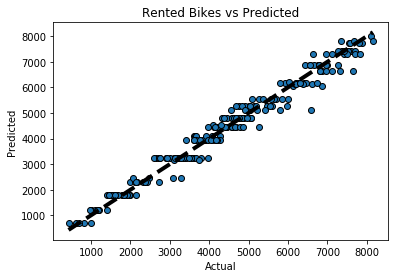

In [88]:
#So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [89]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(Y_Test,Y_Predictions)

# Error  is getting  "6.6932692478504645"
#Decison Tree with depth of 5 gives accuracy of 
#Accuracy = 100 - 6.69 = 93.31%

7.092190225993685

In [90]:
#Changing Depth of the tree to 8 inorder to deal with overfitting problem.
#Training Decision tree
DecisionTree = DecisionTreeRegressor(max_depth=8,random_state=0)
DecisionTree.fit(X_Train,Y_Train)
from sklearn.metrics import mean_squared_error, r2_score
Score = DecisionTree.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = DecisionTree.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))


Coefficient of determination R^2 of the prediction.: 0.999265680268328
Mean squared error: 37985.70
Test Variance score: 0.99


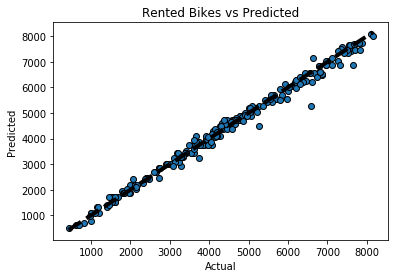

In [91]:
#So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [92]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(Y_Test,Y_Predictions)

# Error  is getting  "4.221194411777287"
#Decison Tree with depth of 8 gives accuracy of 
#Accuracy = 100 - 4.22 = 95.78% 

3.654927117574174

In [93]:
#Changing Depth of the tree to 10 inorder to deal with overfitting problem.
#Training Decision tree
DecisionTree = DecisionTreeRegressor(max_depth=10,random_state=0)
DecisionTree.fit(X_Train,Y_Train)
from sklearn.metrics import mean_squared_error, r2_score
Score = DecisionTree.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = DecisionTree.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))


Coefficient of determination R^2 of the prediction.: 0.999935771572415
Mean squared error: 31928.64
Test Variance score: 0.99


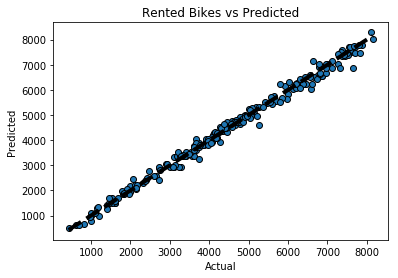

In [94]:
#So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [95]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(Y_Test,Y_Predictions)

# Error  is getting  "3.9953670763953584"
#Decison Tree with depth of 10 gives accuracy of 
#Accuracy = 100 - 3.96 = 96.01%


3.6582586332602745

In [96]:
#Changing Depth of the tree to 11 inorder to deal with overfitting problem.
#Training Decision tree
DecisionTree = DecisionTreeRegressor(max_depth=11,random_state=0)
DecisionTree.fit(X_Train,Y_Train)
from sklearn.metrics import mean_squared_error, r2_score
Score = DecisionTree.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = DecisionTree.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))


Coefficient of determination R^2 of the prediction.: 0.9999770324288008
Mean squared error: 32126.76
Test Variance score: 0.99


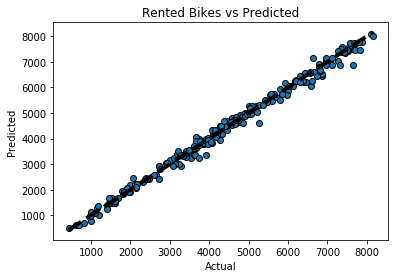

In [97]:
#So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [98]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(Y_Test,Y_Predictions)

# Error  is getting  "3.4876502170083055"
#Decison Tree with depth of 11 gives accuracy of 
#Accuracy = 100 - 3.48 = 96.52%

3.6852051975912756

In [99]:
#Changing Depth of the tree to 12 inorder to deal with overfitting problem.
#Training Decision tree
DecisionTree = DecisionTreeRegressor(max_depth=12,random_state=0)
DecisionTree.fit(X_Train,Y_Train)
from sklearn.metrics import mean_squared_error, r2_score
Score = DecisionTree.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = DecisionTree.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))


Coefficient of determination R^2 of the prediction.: 0.999994386815079
Mean squared error: 40042.05
Test Variance score: 0.99


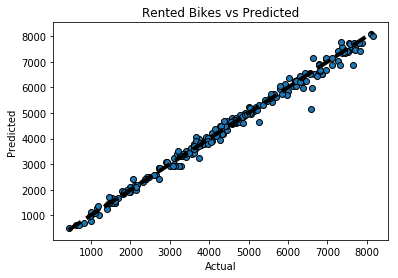

In [100]:
#So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [101]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(Y_Test,Y_Predictions)

# Error  is getting  "3.9698607648188022"

#There is very less differece between the MAPE vales of last two trained models.
#So I am stopping my iteration to improve model accuracy.

#Decison Tree with depth of 12 gives accuracy of 
#Accuracy = 100 - 3.55 = 96.45%

#Since accuracy of our model is decreacing so Decsion tree with 11 depth is givining best performance

3.6043570295549237

In [102]:
#Changing Depth of the tree to 11 inorder to deal with overfitting problem.
#Training Decision tree
DecisionTree = DecisionTreeRegressor(max_depth=11,random_state=0)
DecisionTree.fit(X_Train,Y_Train)
from sklearn.metrics import mean_squared_error, r2_score
Score = DecisionTree.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = DecisionTree.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))


Coefficient of determination R^2 of the prediction.: 0.9999770324288008
Mean squared error: 32126.76
Test Variance score: 0.99


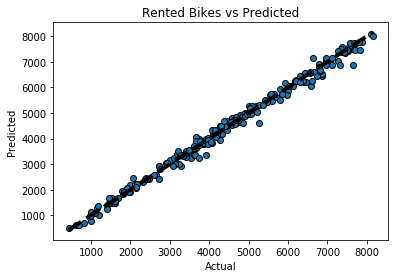

In [103]:
#So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [104]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(Y_Test,Y_Predictions)

# Error  is getting  "3.4876502170083055"
#Decison Tree with depth of 11 gives accuracy of 
#Accuracy = 100 - 3.48 = 96.52%

3.6852051975912756

In [105]:
#Random Forest Model
RandomForest = RandomForestRegressor(n_estimators=500, random_state=100)
RandomForest.fit(X_Train,Y_Train)
Score = RandomForest.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = RandomForest.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))


Coefficient of determination R^2 of the prediction.: 0.9993965638538044
Mean squared error: 14407.76
Test Variance score: 1.00


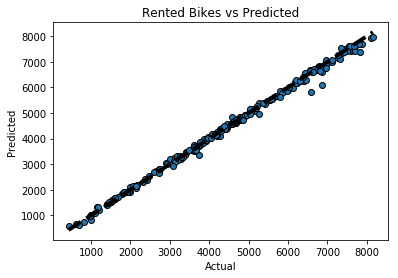

In [106]:
#let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [107]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(Y_Test,Y_Predictions)

# Error  is getting  "2.0679781761261196"

#Random Forest with number of trees = 500 gives accuracy of 
#Accuracy = 100 - 2.07 = 97.93%

2.1452212949442258

In [108]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
RandomForest = RandomForestRegressor(n_estimators=1000, random_state=100)
RandomForest.fit(X_Train,Y_Train)
from sklearn.metrics import mean_squared_error, r2_score
Score = RandomForest.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = RandomForest.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))


Coefficient of determination R^2 of the prediction.: 0.999383217089226
Mean squared error: 14279.01
Test Variance score: 1.00


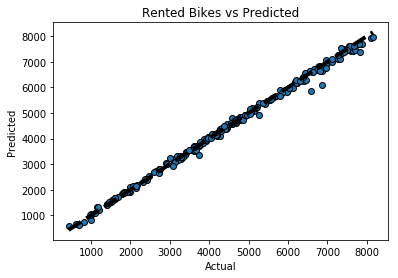

In [109]:
#let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [110]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(Y_Test,Y_Predictions)

# Error  is getting  "2.2540400327759462"

#Random Forest with number of trees = 1000 gives accuracy of 
#Accuracy = 100 - 2.25 = 97.75%



2.14390373091209

In [111]:
#Inspecting Feature Importance for Random Forest
FeatureImportance = pd.DataFrame(RandomForest.feature_importances_,
                                   index = X_Train.columns,
                                    columns=['Importance']).sort_values('Importance', ascending=False)
FeatureImportance

Importance
RegisteredUsers       0.907195
CasualUsers           0.085178
Index                 0.002516
Temperature           0.001129
FeelingTemperature    0.000911
Humidity              0.000711
WindSpeed             0.000708
WeekDay               0.000523
Month                 0.000393
WorkingDay            0.000313
Season                0.000163
DayWeather            0.000108
Year                  0.000099
Holiday               0.000052

C:\Users\Gursimran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Gursimran\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


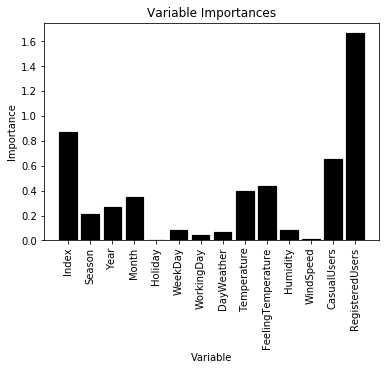

In [125]:
Imp = list(RandomForest.feature_importances_)
# list of x locations for plotting
temp = fs.mutual_info_regression(X_Train,Y_Train)
X_Values = list(range(len(fs.mutual_info_regression(X_Train,Y_Train))))
# Make a bar chart
plt.bar(X_Values,temp, orientation = 'vertical', color = 'black', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(X_Values, X_Train, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [128]:
#From the above graph is stating  that  only  few features are important to decide the  accuracy of the model
#wil check our model accuracy  by reducing features

X_Train1 = X_Train[['Season','Year','Month','DayWeather','Temperature','CasualUsers','RegisteredUsers']]
X_Test1 = X_Test[['Season','Year','Month','DayWeather','Temperature','CasualUsers','RegisteredUsers']]

# Build random forest model

RandomForest1= RandomForestRegressor(n_estimators=1000, random_state=100)
RandomForest1.fit(X_Train1,Y_Train)
# Predict the model using predict funtion
Y_Predictions= RandomForest1.predict(X_Test1)

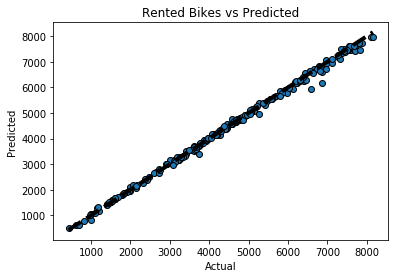

In [129]:
#let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [130]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(Y_Test,Y_Predictions)

# Error  is getting  "2.0508197845515452"

#Random Forest with number of trees = 1000 gives accuracy of 
#Accuracy = 100 - 2.05 = 97.95%



1.815932290912814

In [131]:
# Build random forest model

RandomForest1= RandomForestRegressor(n_estimators=1500, random_state=100)
RandomForest1.fit(X_Train1,Y_Train)
# Predict the model using predict funtion
Y_Predictions= RandomForest1.predict(X_Test1)

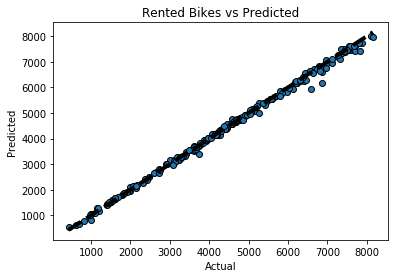

In [132]:
#let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0))
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [133]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
MAPE(Y_Test,Y_Predictions)
# Error  is getting  "2.0440519902886276"
#Random Forest with number of trees = 1000 gives accuracy of 
#Accuracy = 100 - 2.04 = 97.96%
#Since there is very less increase in accuracy so I am stopping my iterations here only.

1.8052813497628317

In [134]:
X_Train.corr()

Index    Season      Year     Month   Holiday  \
Index               1.000000  0.441529  0.869597  0.508943  0.010089   
Season              0.441529  1.000000  0.048828  0.813606  0.013229   
Year                0.869597  0.048828  1.000000  0.019563 -0.000352   
Month               0.508943  0.813606  0.019563  1.000000  0.024565   
Holiday             0.010089  0.013229 -0.000352  0.024565  1.000000   
WeekDay            -0.004180 -0.012969 -0.008687  0.000396 -0.089754   
WorkingDay          0.031886  0.013155  0.026302  0.021094 -0.254630   
DayWeather          0.002997  0.011070 -0.012252  0.029635 -0.071929   
Temperature         0.136566  0.324394  0.048980  0.190860 -0.014478   
FeelingTemperature  0.133818  0.330510  0.044060  0.194413 -0.017727   
Humidity            0.005643  0.152123 -0.100847  0.186262 -0.042628   
WindSpeed          -0.069045 -0.228254  0.023378 -0.184353 -0.001044   
CasualUsers         0.231786  0.222616  0.211583  0.099447  0.083375   
RegisteredUsers     0.649774  0.425950  0.589559  0.293154 -0.098618   

                     WeekDay  WorkingDay  DayWeather  Temperature  \
Index              -0.004180    0.031886    0.002997     0.136566   
Season             -0.012969    0.013155    0.011070     0.324394   
Year               -0.008687    0.026302   -0.012252     0.048980   
Month               0.000396    0.021094    0.029635     0.190860   
Holiday            -0.089754   -0.254630   -0.071929    -0.014478   
WeekDay             1.000000    0.025218    0.009152    -0.040099   
WorkingDay          0.025218    1.000000    0.044789     0.057643   
DayWeather          0.009152    0.044789    1.000000    -0.145168   
Temperature        -0.040099    0.057643   -0.145168     1.000000   
FeelingTemperature -0.049989    0.056996   -0.148042     0.989251   
Humidity           -0.087613    0.007232    0.605572     0.110714   
WindSpeed           0.033329   -0.015960    0.089744    -0.182970   
CasualUsers         0.037398   -0.509445   -0.251580     0.545108   
RegisteredUsers     0.043438    0.334091   -0.238777     0.536258   

                    FeelingTemperature  Humidity  WindSpeed  CasualUsers  \
Index                         0.133818  0.005643  -0.069045     0.231786   
Season                        0.330510  0.152123  -0.228254     0.222616   
Year                          0.044060 -0.100847   0.023378     0.211583   
Month                         0.194413  0.186262  -0.184353     0.099447   
Holiday                      -0.017727 -0.042628  -0.001044     0.083375   
WeekDay                      -0.049989 -0.087613   0.033329     0.037398   
WorkingDay                    0.056996  0.007232  -0.015960    -0.509445   
DayWeather                   -0.148042  0.605572   0.089744    -0.251580   
Temperature                   0.989251  0.110714  -0.182970     0.545108   
FeelingTemperature            1.000000  0.125447  -0.211080     0.542052   
Humidity                      0.125447  1.000000  -0.217953    -0.082607   
WindSpeed                    -0.211080 -0.217953   1.000000    -0.200556   
CasualUsers                   0.542052 -0.082607  -0.200556     1.000000   
RegisteredUsers               0.536711 -0.102555  -0.240232     0.374734   

                    RegisteredUsers  
Index                      0.649774  
Season                     0.425950  
Year                       0.589559  
Month                      0.293154  
Holiday                   -0.098618  
WeekDay                    0.043438  
WorkingDay                 0.334091  
DayWeather                -0.238777  
Temperature                0.536258  
FeelingTemperature         0.536711  
Humidity                  -0.102555  
WindSpeed                 -0.240232  
CasualUsers                0.374734  
RegisteredUsers            1.000000

In [135]:
#Linear Regression Model
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_Train,Y_Train)
Score = LinearRegressionModel.score(X_Train,Y_Train)
print('Coefficient of determination R^2 of the prediction.:',Score)
#Apply model on test data
Y_Predictions = LinearRegressionModel.predict(X_Test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_Test, Y_Predictions))
#Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(Y_Test, Y_Predictions))

Coefficient of determination R^2 of the prediction.: 1.0
Mean squared error: 0.00
Test Variance score: 1.00


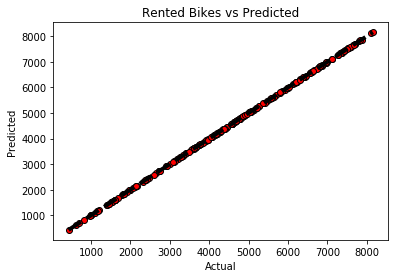

In [136]:
#let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(Y_Test,Y_Predictions, edgecolors=(0, 0, 0),color='red')
ax.plot([Y_Test.min(), Y_Test.max()], [Y_Test.min(), Y_Test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Rented Bikes vs Predicted")
plt.show()

In [138]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(Y_Test,Y_Predictions)

# Error  is getting  "8.700283057576615e-14"

#Random Forest with number of trees = 1000 gives accuracy of 
#Accuracy = 99.9%(Approx)

#There is very less change in Variation in Random forest model so I am stopping my iteration here only.

2.546969023365889e-14

In [ ]:
#Linear Regression is Best for this Problem